In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import itertools
import statsmodels.api as sm
import warnings
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import summary_table

from datetime import date
from datetime import datetime
from scipy.stats import norm

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rufimich/GDP_enviromental/d96989e5bd17b452d900efe8ab39efe4f401eb46/RussiaEcology2.csv',sep=';',decimal=',')
df.head()

,Year,Vibrosi,SO2,NO,CO2,Forg,Ammiak,Othodi,Stoki,Sulfati,...,Zhelezo,pToplivo,pOil,pGas,pCoal,pPerTopl,pGorRes,pEenergy,pTE,pKPT
0,2000,32301,5521,3221,15360,2311,44,1603.0,55.6,2.7,...,268.9,898.4,204.0,526.3,162.8,174.3,32.3,231.1,243.1,791.8
1,2001,33291,5374,3280,16038,2666,45,1834.0,54.7,2.6,...,278.4,900.5,215.6,521.1,158.4,179.6,32.8,243.2,230.5,776.0
2,2002,33930,5108,3296,16923,2757,45,2038.0,54.7,3.1,...,329.3,895.4,242.0,498.5,149.6,205.2,33.2,257.1,204.0,730.8
3,2003,34652,5084,3377,17229,2997,43,2613.5,52.3,2.4,...,322.5,927.5,265.0,512.0,145.0,196.6,32.6,286.1,219.9,730.7
4,2004,35751,4895,3389,18413,3137,44,2644.3,51.3,2.4,...,345.3,951.8,295.3,510.4,140.4,209.6,32.8,313.3,207.5,695.4


In [3]:
df.index=df.Year

In [4]:
df[df.columns[1:16]].head()

,Vibrosi,SO2,NO,CO2,Forg,Ammiak,Othodi,Stoki,Sulfati,Chloridi,Azot,Nitrati,Zhiri,Fenol,Plumbum
Year,,,,,,,,,,,,,,,
2000,32301,5521,3221,15360,2311,44,1603.0,55.6,2.7,7.3,41.3,208.5,15.2,66.6,34.9
2001,33291,5374,3280,16038,2666,45,1834.0,54.7,2.6,7.7,42.7,201.3,13.8,53.1,26.7
2002,33930,5108,3296,16923,2757,45,2038.0,54.7,3.1,8.1,43.2,237.2,14.9,53.6,25.0
2003,34652,5084,3377,17229,2997,43,2613.5,52.3,2.4,7.5,41.6,274.4,13.0,47.7,23.5
2004,35751,4895,3389,18413,3137,44,2644.3,51.3,2.4,6.8,34.6,288.2,9.1,46.2,16.8


In [5]:
Y=['Vibrosi','CO2', 'Othodi', 'Stoki', 'Nitrati']
X=['InvOkr','TekVostOkr','VsegoVost']
X1=['InvVozd','InvVoda','InvZeml']
X2=['TekVostVozd','TekVostVoda','TekVostOthodi','TekVostZeml']


In [6]:
ynames=['Emissions','CO$_2$ emission', 'Waste products', 'Effluent emission', 'Nitrogen effluent emission']
xnames=['Investments into enviromental', 'Current costs of environmental purification', 
        'Total spending into environmental']

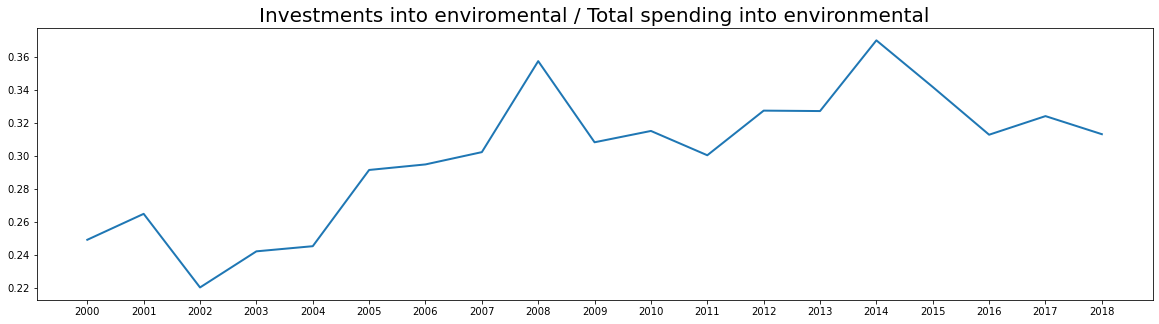

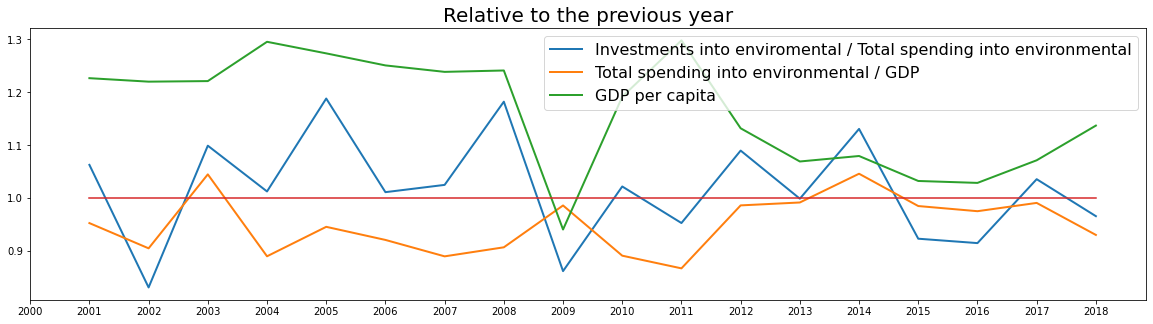

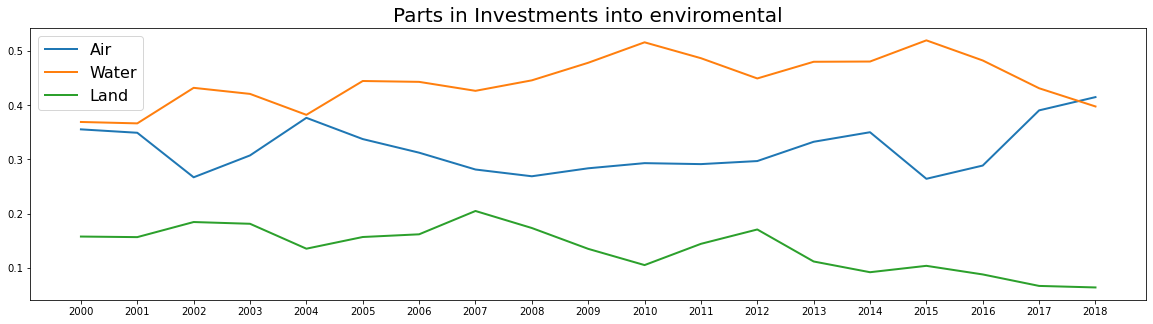

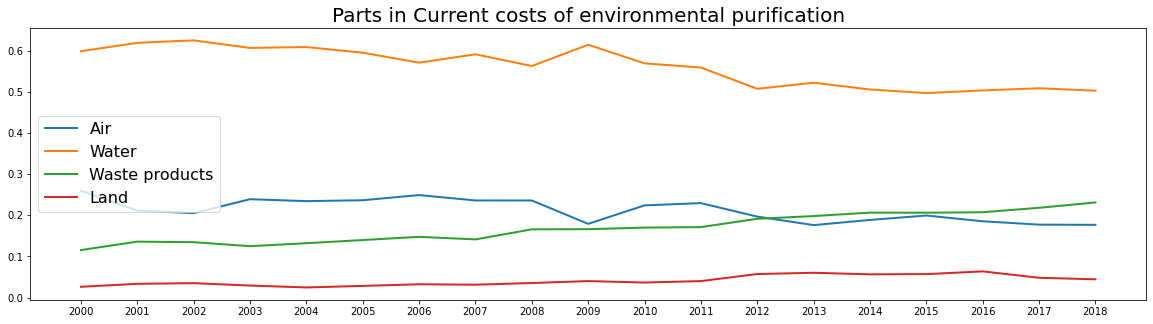

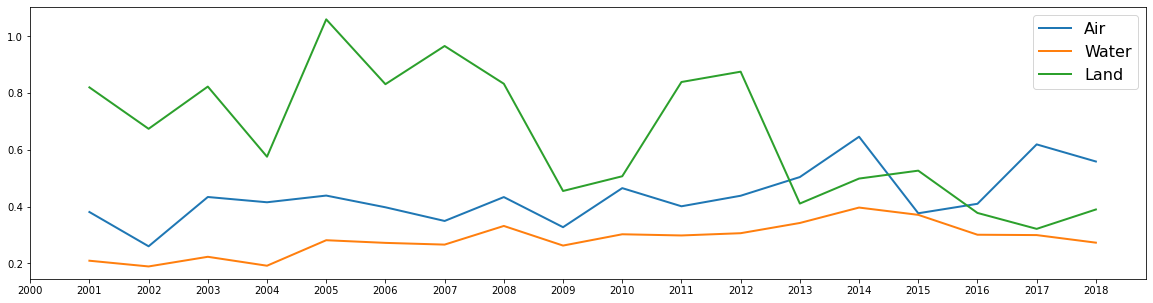

In [7]:
plt.figure(figsize=(20,5))
plt.title (xnames[0]+' / '+xnames[2],fontsize=20)
#plt.ylabel (xnames[0],fontsize=16)
#plt.xlabel (xnames[1],fontsize=16)
#plt.plot(r1,r0,linewidth=5,color='blue')
rrr1=df[X[0]]/df[X[2]]
rrr2=df[X[2]]/df['GDP']
rrr3=df['GDP']/df['People']
plt.plot(rrr1,linewidth=2)
plt.xticks(df.Year,df.Year)
#plt.plot(r0)
#for num,el in enumerate(zip(df[X[1]]/df[X[2]],df[X[0]]/df[X[2]])):
#    plt.text(el[0],el[1],2000+num, fontsize=14)
plt.show()
plt.figure(figsize=(20,5))
plt.title ('Relative to the previous year',fontsize=20)
plt.plot(rrr1/rrr1.shift(1),linewidth=2)
plt.plot(rrr2/rrr2.shift(1),linewidth=2)
plt.plot(rrr3/rrr3.shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])
plt.xticks(df.Year,df.Year)
plt.legend(['Investments into enviromental / Total spending into environmental',
            'Total spending into environmental / GDP','GDP per capita'],fontsize=16)
plt.show()
plt.figure(figsize=(20,5))
plt.title ('Parts in Investments into enviromental',fontsize=20)
for el in X1:
    plt.plot(df[el]/df[X[0]],linewidth=2)
plt.xticks(df.Year,df.Year)
plt.legend(['Air','Water','Land'],fontsize=16)
plt.show()
plt.figure(figsize=(20,5))
plt.title ('Parts in Current costs of environmental purification',fontsize=20)
for el in X2:
    plt.plot(df[el]/df[X[1]],linewidth=2)
plt.xticks(df.Year,df.Year)
plt.legend(['Air','Water','Waste products','Land'],fontsize=16)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(df[X1[0]]/(df[X2[0]]+df[X1[0]]).shift(1),linewidth=2)
plt.plot(df[X1[1]]/(df[X2[1]]+df[X1[1]]).shift(1),linewidth=2)
plt.plot(df[X1[2]]/(df[X2[3]]+df[X1[2]]).shift(1),linewidth=2)
plt.xticks(df.Year,df.Year)
plt.legend(['Air','Water','Land'],fontsize=16)
plt.show()

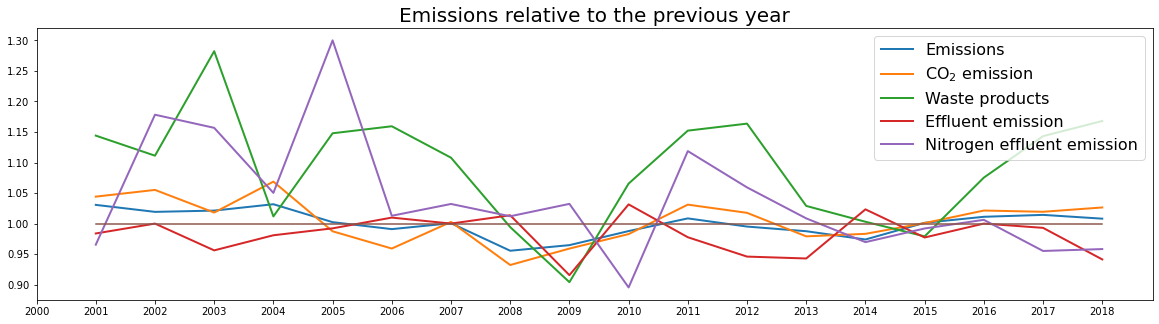

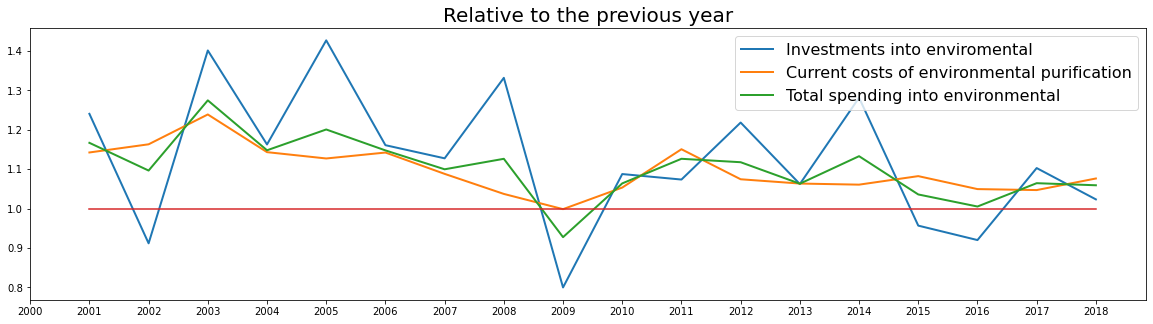

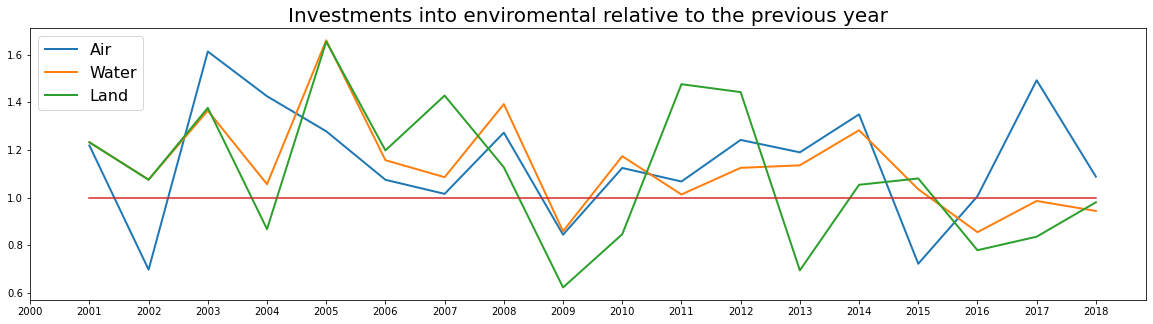

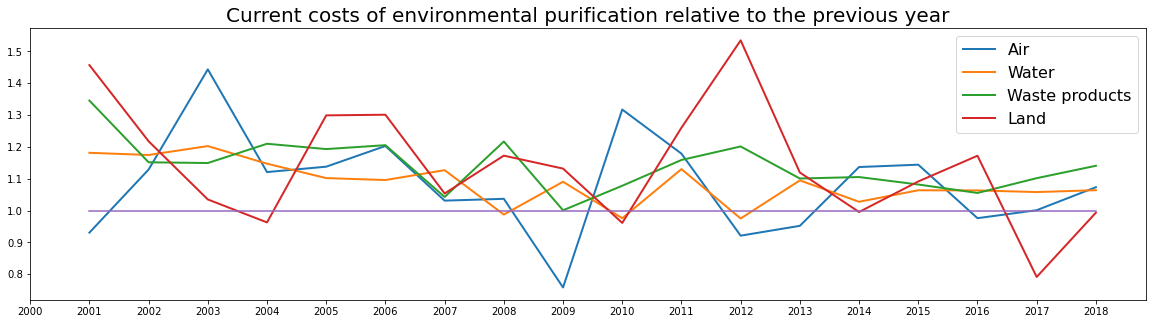

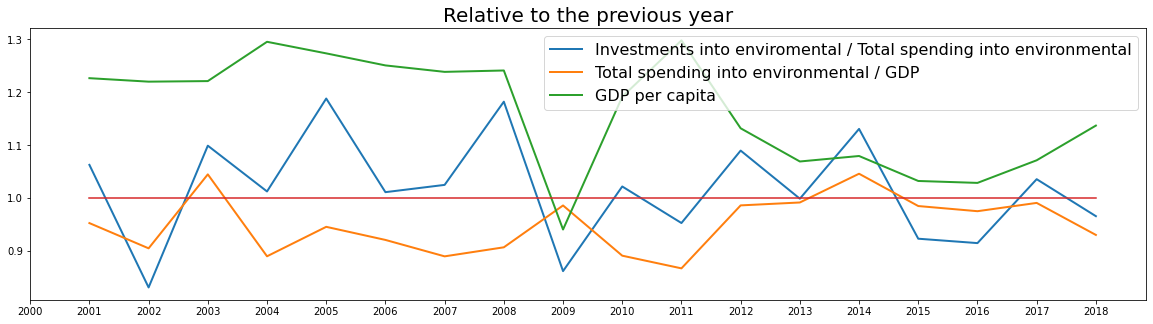

In [8]:
plt.figure(figsize=(20,5))
for el in range(5):
    plt.plot(df[Y[el]]/df[Y[el]].shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])

plt.title ('Emissions relative to the previous year',fontsize=20)
plt.legend (ynames,fontsize=16)
plt.xticks(df.Year,df.Year)
plt.show()
plt.figure(figsize=(20,5))
for el in range(3):
    plt.plot(df[X[el]]/df[X[el]].shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])

plt.title ('Relative to the previous year',fontsize=20)
plt.legend (xnames,fontsize=16)
plt.xticks(df.Year,df.Year)
plt.show()

plt.figure(figsize=(20,5))
plt.title ('Investments into enviromental relative to the previous year',fontsize=20)
for el in X1:
    plt.plot(df[el]/df[el].shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])

plt.legend (['Air','Water','Land'],fontsize=16)
plt.xticks(df.Year,df.Year)
plt.show()

plt.figure(figsize=(20,5))
plt.title ('Current costs of environmental purification relative to the previous year',fontsize=20)
for el in X2:
    plt.plot(df[el]/df[el].shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])

plt.legend (['Air','Water','Waste products','Land'],fontsize=16)
plt.xticks(df.Year,df.Year)
plt.show()


plt.figure(figsize=(20,5))
plt.title ('Relative to the previous year',fontsize=20)
plt.plot(rrr1/rrr1.shift(1),linewidth=2)
plt.plot(rrr2/rrr2.shift(1),linewidth=2)
plt.plot(rrr3/rrr3.shift(1),linewidth=2)
plt.plot([2001,2018],[1,1])
plt.xticks(df.Year,df.Year)
plt.legend(['Investments into enviromental / Total spending into environmental',
            'Total spending into environmental / GDP','GDP per capita'],fontsize=16)
plt.show()


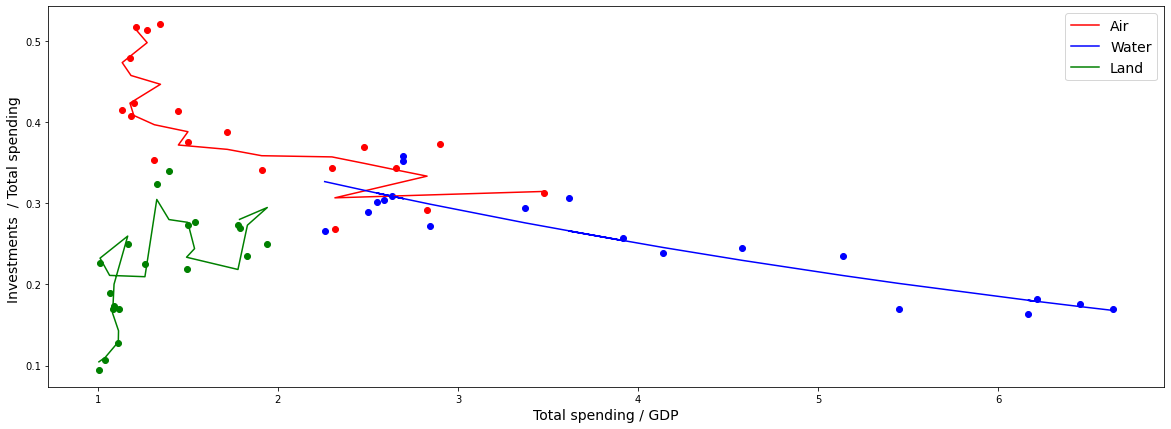

In [9]:
ddf3=df[['Year']]
uTIV=df[X1[0]]+df[X2[0]]
uTIW=df[X1[1]]+df[X2[1]]
uTIZ=df[X1[2]]+df[X2[2]]+df[X2[3]]
uIV=df[X1[0]]
uIW=df[X1[1]]
uIZ=df[X1[2]]
uGDP=df['GDP']
py1=uIV/uTIV
py2=uIW/uTIW
py3=uIZ/uTIZ
px1=uTIV/uGDP
px2=uTIW/uGDP
px3=uTIZ/uGDP
ddf3['X1']=px1
ddf3['X2']=px2
ddf3['X3']=px3
ddf3['Y1']=py1
ddf3['Y2']=py2
ddf3['Y3']=py3
ddf3['lnY1']=np.log(py1)
ddf3['lnY2']=np.log(py2)
ddf3['lnY3']=np.log(py3)

plt.figure(figsize=(20,7))

plt.scatter(px1,py1,color='red')
plt.scatter(px2,py2,color='blue')
plt.scatter(px3,py3,color='green')
modelTI1 = smf.ols('lnY1 ~ Year+X1',data=ddf3).fit(cov_type='HC1')  
modelTI2 = smf.ols('lnY2 ~ X2',data=ddf3).fit(cov_type='HC1')  
modelTI3 = smf.ols('lnY3 ~ Year+X2+X3',data=ddf3).fit(cov_type='HC1')  
plt.plot(px1,np.exp(modelTI1.predict(ddf3[['X1','X2','X3','Year']])),color='red')
plt.plot(px2,np.exp(modelTI2.predict(ddf3[['X1','X2','X3','Year']])),color='blue')
plt.plot(px3,np.exp(modelTI3.predict(ddf3[['X1','X2','X3','Year']])),color='green')
plt.xlabel ('Total spending / GDP',fontsize=14)
plt.ylabel ('Investments  / Total spending ',fontsize=14)
plt.legend(['Air','Water','Land'],fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY1   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     18.35
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           7.22e-05
Time:                        08:20:35   Log-Likelihood:                 17.387
No. Observations:                  19   AIC:                            -28.77
Df Residuals:                      16   BIC:                            -25.94
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.3335     19.457     -4.026      0.0

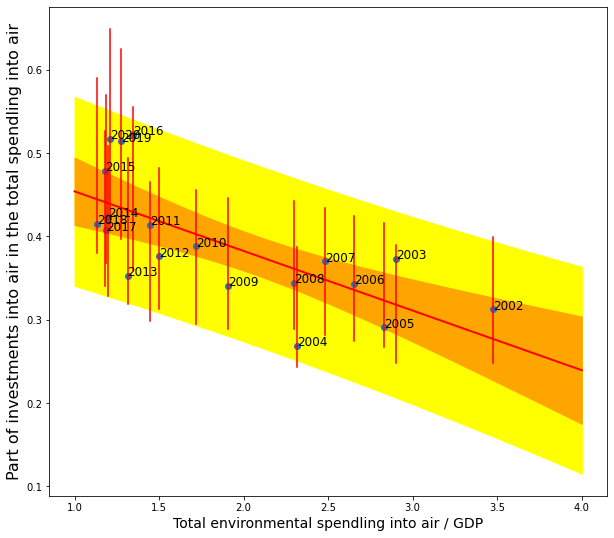

In [10]:
df3=pd.DataFrame(np.linspace(1,4,100),columns=['X1'])
print(modelTI1.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y1 ~ X1 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI1  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X1'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X1'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X1'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X1'],ddf3['Y1'])
    
    
for num,els in enumerate(np.array(ddf3[['X1','Y1']])):
    plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.ylabel ('Part of investments into air in the total spendling into air',fontsize=16)
plt.xlabel ('Total environmental spendling into air / GDP',fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY2   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     100.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.46e-08
Time:                        08:20:36   Log-Likelihood:                 16.926
No. Observations:                  19   AIC:                            -29.85
Df Residuals:                      17   BIC:                            -27.96
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7744      0.073    -10.629      0.0

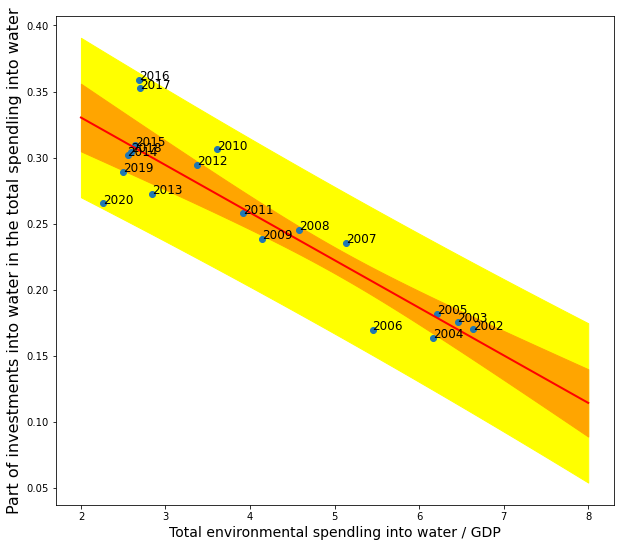

In [11]:
df3=pd.DataFrame(np.linspace(2,8,100),columns=['X2'])
print(modelTI2.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y2 ~ X2 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI2  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X2'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X2'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X2'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X2'],ddf3['Y2'])
    
    
for num,els in enumerate(np.array(ddf3[['X2','Y2']])):
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.ylabel ('Part of investments into water in the total spendling into water',fontsize=16)
plt.xlabel ('Total environmental spendling into water / GDP',fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY3   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     63.51
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           9.35e-09
Time:                        08:20:36   Log-Likelihood:                 14.455
No. Observations:                  19   AIC:                            -20.91
Df Residuals:                      15   BIC:                            -17.13
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    321.3835     33.166      9.690      0.0

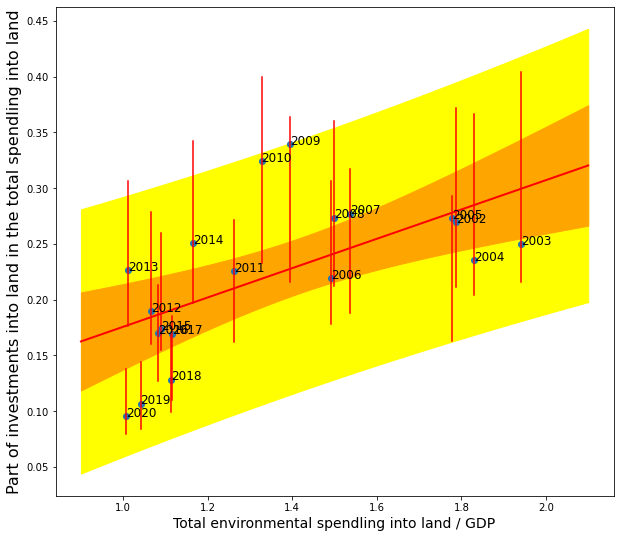

In [12]:
df3=pd.DataFrame(np.linspace(0.9,2.1,100),columns=['X3'])
print(modelTI3.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y3 ~ X3 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI3  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X3'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X3'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X3'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X3'],ddf3['Y3'])
    
    
for num,els in enumerate(np.array(ddf3[['X3','Y3']])):
    plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.ylabel ('Part of investments into land in the total spendling into land',fontsize=16)
plt.xlabel ('Total environmental spendling into land / GDP',fontsize=14)
plt.show()


In [13]:
df1=df[['Year']+X+Y+X1+X2]
#df1['RRR']=(rrr1/rrr1.shift(1)).shift(1)
df1['I_TI']=rrr1
df1['IV_TIV']=df[X1[0]]/(df[X1[0]]+df[X2[0]])
df1['IW_TIW']=df[X1[1]]/(df[X1[1]]+df[X2[1]])
df1['IZ_TIZ']=df[X1[2]]/(df[X1[2]]+df[X2[3]]+df[X2[2]])
df1['I_TI_p']=rrr1/(rrr1).shift(1)
df1['IV_TIV_p']=(df[X1[0]]/(df[X1[0]]+df[X2[0]]))/((df[X1[0]]/(df[X1[0]]+df[X2[0]]))).shift(1)
df1['IW_TIW_p']=(df[X1[1]]/(df[X1[1]]+df[X2[1]]))/(df[X1[1]]/(df[X1[1]]+df[X2[1]])).shift(1)
df1['IZ_TIZ_p']=(df[X1[2]]/(df[X1[2]]+df[X2[3]]+df[X2[2]]))/(df[X1[2]]/(df[X1[2]]+df[X2[3]]+df[X2[2]])).shift(1)
df1['TI_GDP_p']=rrr2/rrr2.shift(1)
df1['TIV_TI']=(df[X1[0]]+df[X2[0]])/df['VsegoVost']
df1['TIW_TI']=(df[X1[1]]+df[X2[1]])/df['VsegoVost']
df1['TIZ_TI']=(df[X1[2]]+df[X2[3]]+df[X2[2]])/df['VsegoVost']
df1['TIV_TI_p']=df1['TIV_TI']/df1['TIV_TI'].shift(1)
df1['TIW_TI_p']=df1['TIW_TI']/df1['TIW_TI'].shift(1)
df1['TIZ_TI_p']=df1['TIZ_TI']/df1['TIZ_TI'].shift(1)

sdf=['TIV_GDP','TIW_GDP']
mTI=[]
sTI=[]
for num, el in enumerate(sdf):
    rrrrr=(df[X2[num]]+df[X1[num]])/df['GDP']
    mTI.append(((df[X2[num]]+df[X1[num]])/df[X[2]]).mean())
    sTI.append(((df[X2[num]]+df[X1[num]])/df[X[2]]).std())
    df1[el]=rrrrr
    df1[el+'_p']=rrrrr/rrrrr.shift(1)
rrrrr=(df[X2[2]]+df[X2[3]]+df[X1[2]])/df['GDP']
mTI.append(((df[X2[2]]+df[X2[3]]+df[X1[2]])/df[X[2]]).mean())
sTI.append(((df[X2[2]]+df[X2[3]]+df[X1[2]])/df[X[2]]).std())
df1['TIZ_GDP']=rrrrr
df1['TIZ_GDP_p']=rrrrr/rrrrr.shift(1)

df1['GDP_P']=rrr3
df1['GDP_P_p']=rrr3/rrr3.shift(1)
df1['Year1']=df['Year']-2000
df1['lnYear']=np.log(df1['Year1'])

for el in range(5):
    df1[Y[el]]=df[Y[el]]
    df1[Y[el]+'_p']=df[Y[el]]/df[Y[el]].shift(1)
    df1['ln'+Y[el]+'_p']=np.log(df[Y[el]]/df[Y[el]].shift(1))

df1.head(10)

,Year,InvOkr,TekVostOkr,VsegoVost,Vibrosi,CO2,Othodi,Stoki,Nitrati,InvVozd,...,Vibrosi_p,lnVibrosi_p,CO2_p,lnCO2_p,Othodi_p,lnOthodi_p,Stoki_p,lnStoki_p,Nitrati_p,lnNitrati_p
Year,,,,,,,,,,,,,,,,,,,,,
2000,2000,22339,67255,89594,32301,15360,1603.0,55.6,208.5,7946.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2001,27710,76832,104542,33291,16038,1834.0,54.7,201.3,9682.0,...,1.030649,0.030189,1.044141,0.043194,1.144105,0.134623,0.983813,-0.016319,0.965468,-0.035143
2002,2002,25270,89365,114635,33930,16923,2038.0,54.7,237.2,6750.0,...,1.019194,0.019012,1.055181,0.053713,1.111232,0.105470,1.000000,0.000000,1.178341,0.164107
2003,2003,35407,110705,146112,34652,17229,2613.5,52.3,274.4,10889.0,...,1.021279,0.021056,1.018082,0.017920,1.282385,0.248721,0.956124,-0.044867,1.156830,0.145683
2004,2004,41168,126560,167728,35751,18413,2644.3,51.3,288.2,15521.0,...,1.031715,0.031223,1.068721,0.066463,1.011785,0.011716,0.980880,-0.019306,1.050292,0.049068
2005,2005,58738,142655,201393,35835,18181,3035.5,50.9,374.7,19839.0,...,1.002350,0.002347,0.987400,-0.012680,1.147941,0.137970,0.992203,-0.007828,1.300139,0.262471
2006,2006,68188,162940,231128,35510,17438,3519.4,51.4,379.5,21316.0,...,0.990931,-0.009111,0.959133,-0.041725,1.159414,0.147914,1.009823,0.009775,1.012810,0.012729
2007,2007,76884,177298,254182,35532,17485,3899.3,51.4,391.7,21642.0,...,1.000620,0.000619,1.002695,0.002692,1.107945,0.102507,1.000000,0.000000,1.032148,0.031642
2008,2008,102388,183905,286293,33952,16299,3876.9,52.1,396.4,27542.0,...,0.955533,-0.045486,0.932170,-0.070240,0.994255,-0.005761,1.013619,0.013527,1.011999,0.011928


In [14]:
models=dict()
df1['lnVibrosi_p_1']=df1['lnVibrosi_p'].shift(-1)
model = smf.ols('lnVibrosi_p_1 ~ TIV_GDP_p +lnYear',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Vibrosi_p']=model

                            OLS Regression Results                            
Dep. Variable:          lnVibrosi_p_1   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     5.269
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0197
Time:                        08:20:37   Log-Likelihood:                 45.869
No. Observations:                  17   AIC:                            -85.74
Df Residuals:                      14   BIC:                            -83.24
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0544      0.030     -1.796      0.0

In [15]:
df1['lnCO2_p_1']=df1['lnCO2_p'].shift(-1)
model = smf.ols('lnCO2_p_1 ~ lnYear+TIV_GDP_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['CO2_p']=model

                            OLS Regression Results                            
Dep. Variable:              lnCO2_p_1   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.887
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0246
Time:                        08:20:37   Log-Likelihood:                 36.464
No. Observations:                  17   AIC:                            -66.93
Df Residuals:                      14   BIC:                            -64.43
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1063      0.053     -2.009      0.0

In [16]:
df1['lnOthodi_p_1']=df1['lnOthodi_p'].shift(-1)
model = smf.ols('lnOthodi_p_1 ~ IW_TIW + IZ_TIZ + TI_GDP_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Othodi_p']=model

                            OLS Regression Results                            
Dep. Variable:           lnOthodi_p_1   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     11.11
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000684
Time:                        08:20:37   Log-Likelihood:                 28.968
No. Observations:                  17   AIC:                            -49.94
Df Residuals:                      13   BIC:                            -46.60
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2571      0.221      5.684      0.0

In [17]:
df1['lnStoki_p_1']=df1['lnStoki_p'].shift(-1)
model = smf.ols('lnStoki_p_1 ~ TIW_GDP_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Stoki_p']=model

                            OLS Regression Results                            
Dep. Variable:            lnStoki_p_1   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     7.269
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0166
Time:                        08:20:37   Log-Likelihood:                 36.873
No. Observations:                  17   AIC:                            -69.75
Df Residuals:                      15   BIC:                            -68.08
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2525      0.090     -2.809      0.0

In [18]:
df1['lnNitrati_p_1']=df1['lnNitrati_p'].shift(-1)
model = smf.ols('lnNitrati_p_1 ~ TIZ_GDP_p+ lnYear -1',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Nitrati_p']=model

                                 OLS Regression Results                                
Dep. Variable:          lnNitrati_p_1   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.359
Method:                 Least Squares   F-statistic:                              14.05
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    0.000364
Time:                        08:20:38   Log-Likelihood:                          20.654
No. Observations:                  17   AIC:                                     -37.31
Df Residuals:                      15   BIC:                                     -35.64
Df Model:                           2                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [19]:
df3=pd.DataFrame(np.linspace(0.2,0.4,100),columns=['I_TI'])

posx and posy should be finite values
posx and posy should be finite values


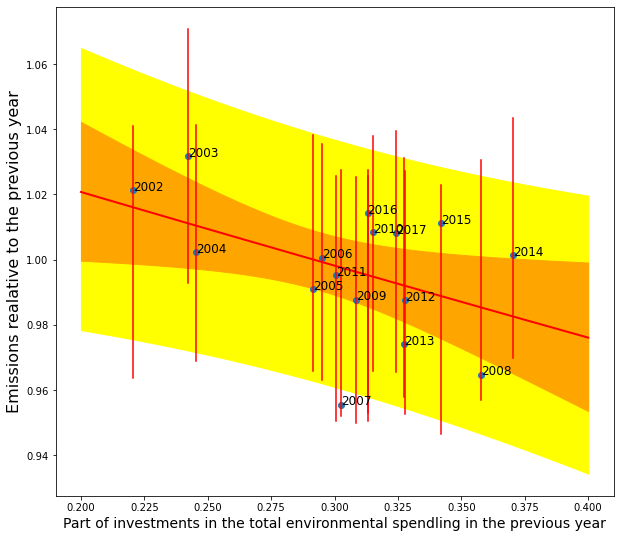

posx and posy should be finite values
posx and posy should be finite values


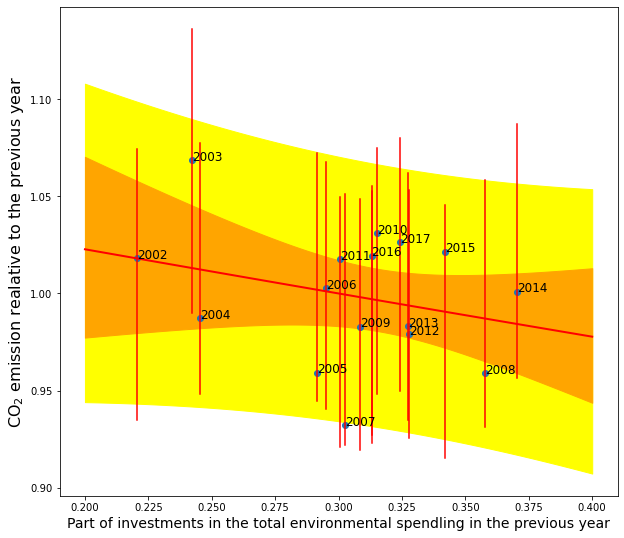

posx and posy should be finite values
posx and posy should be finite values


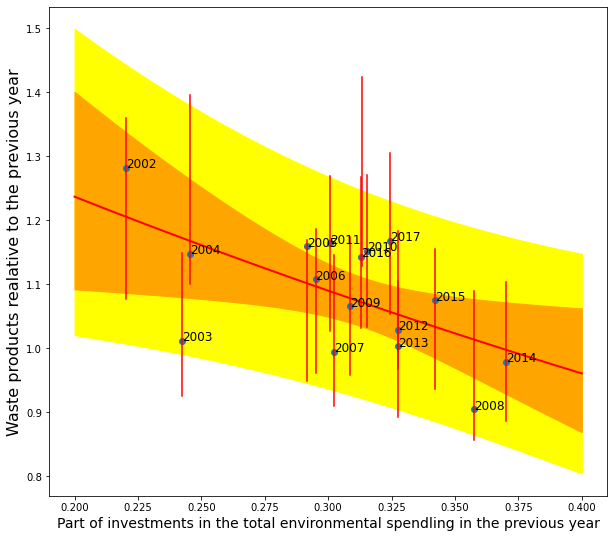

posx and posy should be finite values
posx and posy should be finite values


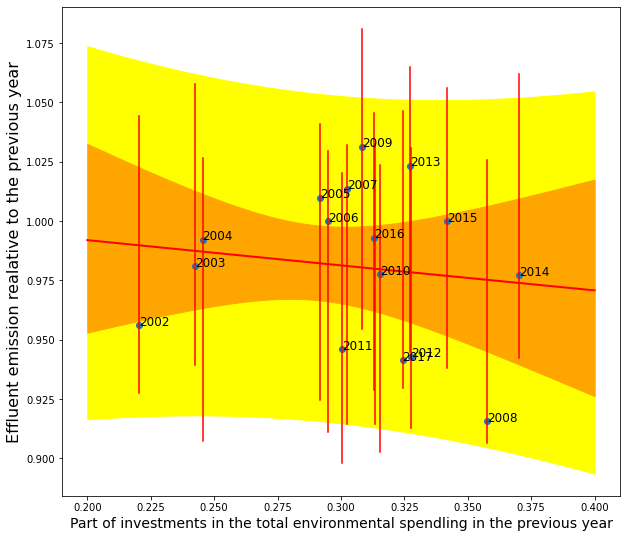

posx and posy should be finite values
posx and posy should be finite values


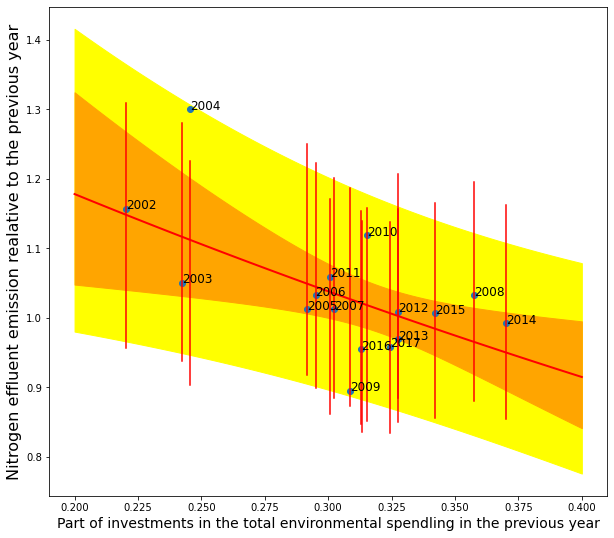

In [20]:
df2=df1[2:]
for el in range(5):
    plt.figure(figsize=(10,9))
    model = smf.ols('ln'+Y[el]+'_p_1'+' ~ I_TI ',data=df2).fit(cov_type='HC1')  
    model2 = models[Y[el]+'_p']  
    #print(model.summary())
    #print(model2.summary())
    res=model.get_prediction(exog=df3)
    sf=res.summary_frame(alpha=0.05)
    res_lo=np.exp(sf['obs_ci_lower'])
    res_up=np.exp(sf['obs_ci_upper'])
    res_lom=np.exp(sf['mean_ci_lower'])
    res_upm=np.exp(sf['mean_ci_upper'])
    #res_lo= (res.conf_int(alpha=0.05).T[0])
    #res_up= (res.conf_int(alpha=0.05).T[1])
    #prstd, res_lo, res_up = wls_prediction_std(model)
    res_mn= np.exp(res.predicted_mean)
    
    res2=model2.get_prediction(exog=df2)
    sf2=res2.summary_frame(alpha=0.05)
    res_lo2=np.exp(sf2['obs_ci_lower'])
    res_up2=np.exp(sf2['obs_ci_upper'])
    res_lom2=np.exp(sf2['mean_ci_lower'])
    res_upm2=np.exp(sf2['mean_ci_upper'])
    res_mn2= np.exp(res2.predicted_mean)
    
    plt.fill_between(df3['I_TI'],np.array(res_lo),np.array(res_up),color='yellow')
    plt.fill_between(df3['I_TI'],np.array(res_lom),np.array(res_upm),color='orange')
    plt.plot(df3['I_TI'],res_mn,color='red',linewidth=2)
    plt.scatter(df2['I_TI'],np.exp(df2['ln'+Y[el]+'_p_1']))
    
    
    for num,els in enumerate(np.array(df2[['I_TI','ln'+Y[el]+'_p_1']])):
        plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
        plt.text(els[0],np.exp(els[1]),2002+num, fontsize=12)

    plt.ylabel (ynames[el] + ' realative to the previous year',fontsize=16)
    plt.xlabel ('Part of investments in the total environmental spendling in the previous year',fontsize=14)
    plt.show()


In [21]:
Ybase=[X1[0],X1[0], X1[2], X1[1], X1[2]]
for el in range(5):
    df1[Y[el]+'_I_p']=(df[Y[el]]/df[Ybase[el]])/(df[Y[el]]/df[Ybase[el]]).shift(1)
    df1['ln'+Y[el]+'_I_p']=np.log(df1[Y[el]+'_I_p'])
    

df1[df1.columns[-10:]].head(10)

,Vibrosi_I_p,lnVibrosi_I_p,CO2_I_p,lnCO2_I_p,Othodi_I_p,lnOthodi_I_p,Stoki_I_p,lnStoki_I_p,Nitrati_I_p,lnNitrati_I_p
Year,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,0.845852,-0.167411,0.856924,-0.154406,0.928579,-0.074099,0.798725,-0.224739,0.783594,-0.243865
2002,1.461902,0.379738,1.513521,0.414439,1.034209,0.033637,0.929996,-0.072575,1.096666,0.092275
2003,0.633082,-0.457155,0.631100,-0.460290,0.931553,-0.070902,0.700538,-0.355906,0.840347,-0.173940
2004,0.723816,-0.323218,0.749778,-0.287978,1.166745,0.154218,0.928995,-0.073652,1.211149,0.191569
2005,0.784186,-0.243109,0.772490,-0.258136,0.693677,-0.365748,0.597682,-0.514696,0.785648,-0.241247
2006,0.922268,-0.080919,0.892674,-0.113534,0.967948,-0.032577,0.872981,-0.135842,0.845555,-0.167762
2007,0.985547,-0.014559,0.987591,-0.012486,0.775751,-0.253924,0.921336,-0.081931,0.722680,-0.324788
2008,0.750840,-0.286562,0.732482,-0.311316,0.882220,-0.125313,0.728073,-0.317355,0.897965,-0.107625


In [22]:
df1['lnVibrosi_I_p']=np.log(df1['Vibrosi_I_p'])
model = smf.ols('lnVibrosi_I_p ~ TIV_TI_p+IV_TIV_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Vibrosi_I_p']=model

                            OLS Regression Results                            
Dep. Variable:          lnVibrosi_I_p   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     99.08
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.27e-09
Time:                        08:20:43   Log-Likelihood:                 24.988
No. Observations:                  18   AIC:                            -43.98
Df Residuals:                      15   BIC:                            -41.31
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2774      0.201     11.321      0.0

In [23]:
df1['lnCO2_I_p']=np.log(df1['CO2_I_p'])
model = smf.ols('lnCO2_I_p ~ TIV_TI_p+IV_TIV_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['CO2_I_p']=model

                            OLS Regression Results                            
Dep. Variable:              lnCO2_I_p   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     80.27
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           9.73e-09
Time:                        08:20:43   Log-Likelihood:                 22.964
No. Observations:                  18   AIC:                            -39.93
Df Residuals:                      15   BIC:                            -37.26
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3064      0.208     11.099      0.0

In [24]:
df1['lnOthodi_I_p']=np.log(df1['Othodi_I_p'])
model = smf.ols('lnOthodi_I_p ~ TIV_TI_p+IZ_TIZ_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Othodi_I_p']=model

                            OLS Regression Results                            
Dep. Variable:           lnOthodi_I_p   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     94.10
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.24e-09
Time:                        08:20:44   Log-Likelihood:                 22.276
No. Observations:                  18   AIC:                            -38.55
Df Residuals:                      15   BIC:                            -35.88
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7707      0.218      3.543      0.0

In [25]:
df1['lnStoki_I_p']=np.log(df1['Stoki_I_p'])
model = smf.ols('lnStoki_I_p ~ IW_TIW_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Stoki_I_p']=model

                            OLS Regression Results                            
Dep. Variable:            lnStoki_I_p   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.71e-08
Time:                        08:20:45   Log-Likelihood:                 23.708
No. Observations:                  18   AIC:                            -43.42
Df Residuals:                      16   BIC:                            -41.64
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9146      0.103      8.882      0.0

In [26]:
df1['lnNitrati_I_p']=np.log(df1['Nitrati_I_p'])
model = smf.ols('lnNitrati_I_p ~ IZ_TIZ_p',data=df1).fit(cov_type='HC1')  
print(model.summary())
models['Nitrati_I_p']=model

                            OLS Regression Results                            
Dep. Variable:          lnNitrati_I_p   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     55.81
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.33e-06
Time:                        08:20:46   Log-Likelihood:                 14.585
No. Observations:                  18   AIC:                            -25.17
Df Residuals:                      16   BIC:                            -23.39
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1376      0.161      7.055      0.0

CO2_I_p


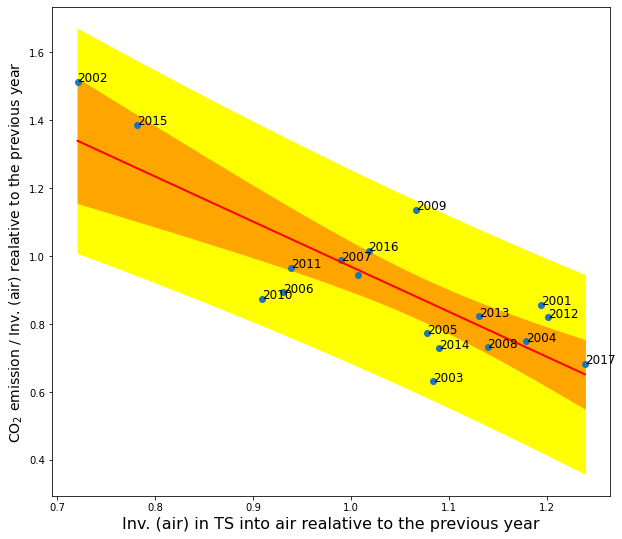

Vibrosi_I_p


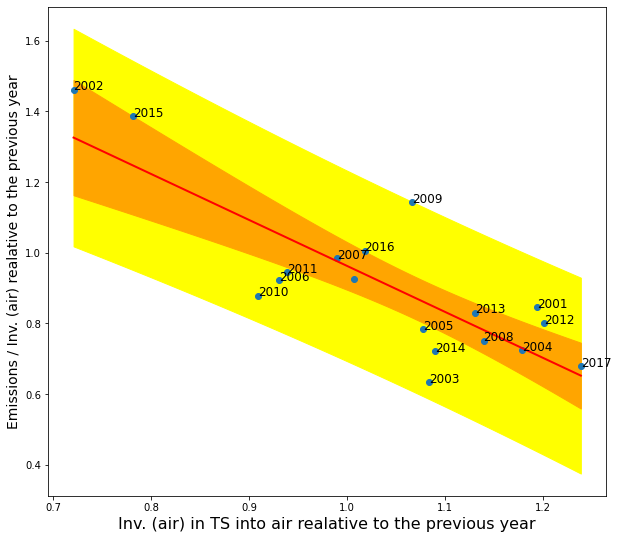

Stoki_I_p


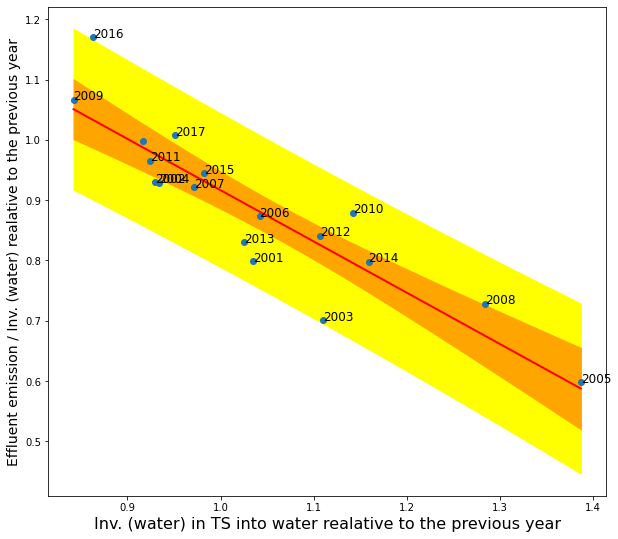

Othodi_I_p


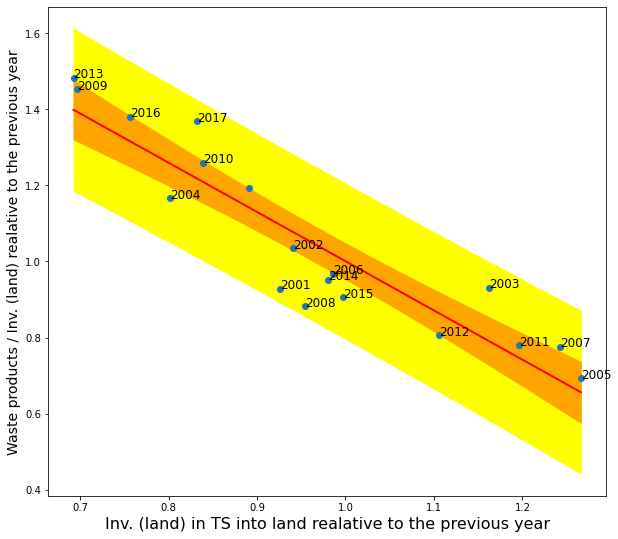

Nitrati_I_p


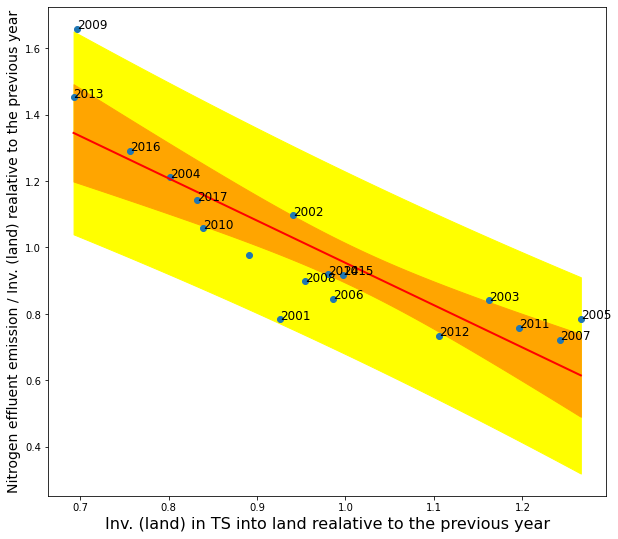

In [27]:
yyy=['CO2_I_p','Vibrosi_I_p','Stoki_I_p','Othodi_I_p','Nitrati_I_p']
xxx=['IV_TIV_p','IV_TIV_p','IW_TIW_p','IZ_TIZ_p','IZ_TIZ_p']
yyynames=['CO$_2$ emission','Emissions','Effluent emission','Waste products', 'Nitrogen effluent emission']
xxxnames=['air', 'air','water','land','land']
for num,el in enumerate(yyy):
    print(el)
    df03=pd.DataFrame(np.linspace(df1[xxx[num]].min(),df1[xxx[num]].max(),100),columns=[xxx[num]])
    plt.figure(figsize=(10,9))
    model = smf.ols(el+' ~ '+xxx[num],data=df1).fit(cov_type='HC1')  
    #print(model.summary())
    #print(model2.summary())
    res=model.get_prediction(exog=df03)
    sf=res.summary_frame(alpha=0.05)
    res_lo=sf['obs_ci_lower']
    res_up=sf['obs_ci_upper']
    res_lom=sf['mean_ci_lower']
    res_upm=sf['mean_ci_upper']
    #res_lo= (res.conf_int(alpha=0.05).T[0])
    #res_up= (res.conf_int(alpha=0.05).T[1])
    #prstd, res_lo, res_up = wls_prediction_std(model)
    res_mn= (res.predicted_mean)

    
    model2 = models[el]  
    res2=model2.get_prediction(exog=df1)
    sf2=res2.summary_frame(alpha=0.05)
    res_lo2=np.exp(sf2['obs_ci_lower'])
    res_up2=np.exp(sf2['obs_ci_upper'])
    res_lom2=np.exp(sf2['mean_ci_lower'])
    res_upm2=np.exp(sf2['mean_ci_upper'])
    res_mn2= np.exp(res2.predicted_mean)

    
   
    plt.fill_between(df03[xxx[num]],np.array(res_lo),np.array(res_up),color='yellow')
    plt.fill_between(df03[xxx[num]],np.array(res_lom),np.array(res_upm),color='orange')
    plt.plot(df03[xxx[num]],res_mn,color='red',linewidth=2)
    plt.scatter(df1[xxx[num]],df1[el])
    
    
    for num1,els in enumerate(np.array(df1[[xxx[num],el]].loc[range(2001,2018)])):
        plt.text(els[0],els[1],2001+num1, fontsize=12)

    plt.xlabel ('Inv. ('+xxxnames[num]+') in TS into '+ xxxnames[num] + ' realative to the previous year',fontsize=16)
    plt.ylabel (yyynames[num] + ' / Inv. ('+xxxnames[num]+') realative to the previous year',fontsize=14)
    plt.show()


# Сценарий 1. Регулируем TS/GDP

In [28]:
df_it1=pd.DataFrame(range(2019,2031),columns=['Year'])
df_it1['lnY']=np.log(df_it1.Year-1940)
df_it1.index=df_it1.Year
df_it1.head()

,Year,lnY
Year,,
2019,2019,4.369448
2020,2020,4.382027
2021,2021,4.394449
2022,2022,4.406719
2023,2023,4.418841


In [29]:
df1['TIGDP']=df[X[2]]/df['GDP']
df1.index= df1.Year


                            OLS Regression Results                            
Dep. Variable:                lnTIGDP   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     264.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           5.54e-13
Time:                        08:20:58   Log-Likelihood:                 26.200
No. Observations:                  19   AIC:                            -46.40
Df Residuals:                      16   BIC:                            -43.57
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -415.7408    125.298     -3.318      0.0

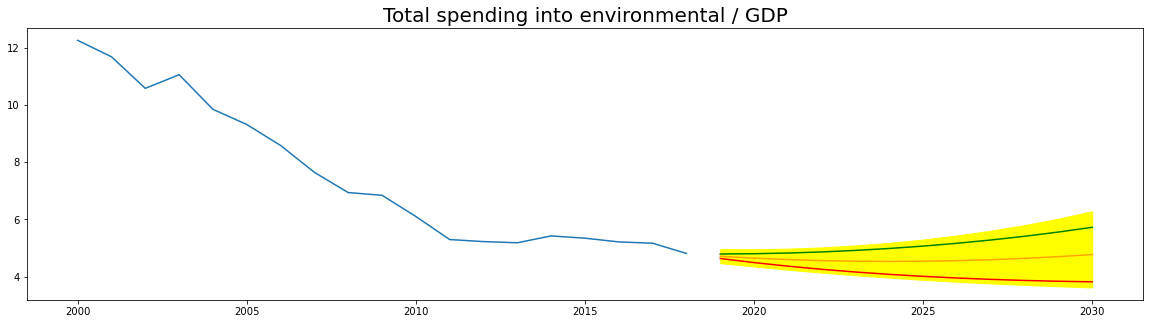

In [30]:
ss1='lnTIGDP'
ss2='TIGDP'
df1[ss1]=np.log(df1[ss2])
df1['lnY']=np.log(df1.Year-1940)
best_model2 = smf.ols(ss1+' ~ Year +lnY ',data=df1).fit(cov_type='HC1')  
model_TI_GDP=best_model2
print(best_model2.summary()) 
res2=best_model2.get_prediction(exog=df_it1)
res_lo2= np.exp(res2.conf_int(alpha=0.1).T[0])
res_up2= np.exp(res2.conf_int(alpha=0.1).T[1])
res_upq=res_up2
res_mn2= np.exp(res2.predicted_mean)
res_mnq=res_mn2
plt.figure(figsize=(20,5))
plt.title ('Total spending into environmental / GDP',fontsize=20)
plt.plot(df1[ss2])
ggg=list(df1[ss2])[-1]
ttt=np.arange(1,13)/12
plt.plot(df_it1.index,res_mn2,color='orange')
plt.fill_between(df_it1.index,res_lo2,res_up2,color='yellow')
plt.plot(df_it1.index,(1-ttt*0.2)*res_mn2,color='red')
#plt.fill_between(df_it1.index,np.array(res_lo2)*(1-ttt*0.2),(1-ttt*0.2)*np.array(res_up2),color='pink')
plt.plot(df_it1.index,(1+0.2*ttt)*res_mn2,color='green')
#plt.fill_between(df_it1.index,(1+0.2*ttt)*np.array(res_lo2),(1+0.2*ttt)*np.array(res_up2),color='lightgreen')

plt.show()


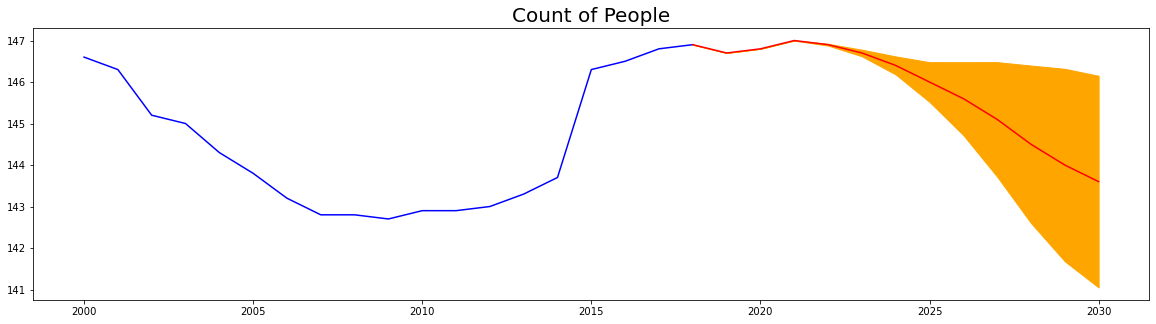

In [31]:
# Определяю прогнозное значение численности населения как случайную величину
mP=[146.9,146.7,146.8,147.0,146.9,146.7,146.4,146.0,145.6,145.1,144.5,144.0,143.6]
sP=[0,0,0.00017838,0.001962181,0.010791995,0.039570649,0.108819284,0.239402425,0.438904446,0.689706987,0.948347107,
    1.159090909,1.275]
plt.figure(figsize=(20,5))
plt.title ('Count of People',fontsize=20)
plt.fill_between(range(2018,2031),np.array(mP)+2*np.array(sP),np.array(mP)-2*np.array(sP),color='orange')
plt.plot(df['People'],color='blue')
plt.plot(range(2018,2031),mP,color='red')
plt.show()

In [32]:
models['IV_TIV']=modelTI1 
models['IW_TIW']=modelTI2 
models['IZ_TIZ']=modelTI3 

In [33]:
def TI_modeling (k=0):
    sr_m=[]
    sr_std=[]
    nn=10000
    df_mod=pd.DataFrame([2018]*nn,columns=['Year'])
    df_mod['Year1']=df_mod['Year']-2001
    df_mod['lnYear']=np.log(df_mod['Year1'])
    xxx=['InvVozd','InvVozd','InvVoda','InvZeml','InvZeml']
    xxx1=['IV','IV','IW','IZ','IZ']

    dft=df.loc[2018]
    dfpr=df.loc[2017]
    Yr=2018

    df_mod['People']=dft.People
    df_mod['People_p']=dft.People/dfpr.People
    df_mod['GDP']=dft.GDP
    df_mod['GDP_P_p']=(dft.GDP/dft.People)/(dfpr.GDP/dfpr.People)
    df_mod['GDP_P']=dft.GDP/dft.People
    for el in range(5):
        df_mod[Y[el]]=dft[Y[el]]
        df_mod[Y[el]+'_p']=dft[Y[el]]/dfpr[Y[el]]

    df_mod['TI_GDP_p']=(dft['VsegoVost']/dft['GDP'])/(dfpr['VsegoVost']/dfpr['GDP'])
    df_mod['TI_GDP']=(dft['VsegoVost']/dft['GDP'])

    df_mod['TIV_GDP']=((dft[X2[0]]+dft[X1[0]])/dft['GDP'])
    df_mod['TIW_GDP']=((dft[X2[1]]+dft[X1[1]])/dft['GDP'])
    df_mod['TIZ_GDP']=((dft[X2[2]]+dft[X2[3]]+dft[X1[2]])/dft['GDP'])
    df_mod['TIV_GDP_p']=((dft[X1[0]]/(dft[X1[0]]+dft[X2[0]])))/((dfpr[X1[0]]/(dfpr[X1[0]]+dfpr[X2[0]])))
    df_mod['TIW_GDP_p']=(((dft[X2[1]]+dft[X1[1]])/dft['GDP']))/(((dfpr[X2[1]]+dfpr[X1[1]])/dfpr['GDP']))
    df_mod['TIZ_GDP_p']=(((dft[X2[2]]+dft[X2[3]]+dft[X1[2]])/dft['GDP']))/(((dfpr[X2[2]]+dfpr[X2[3]]+dfpr[X1[2]])/dfpr['GDP']))
    df_mod['TIV_TI']=df_mod['TIV_GDP']/df_mod['TI_GDP']
    df_mod['TIW_TI']=df_mod['TIW_GDP']/df_mod['TI_GDP']
    df_mod['TIZ_TI']=df_mod['TIZ_GDP']/df_mod['TI_GDP']
    df_mod['TIV_TI_p']=df_mod['TIV_GDP_p']/df_mod['TI_GDP_p']
    df_mod['TIW_TI_p']=df_mod['TIW_GDP_p']/df_mod['TI_GDP_p']
    df_mod['TIZ_TI_p']=df_mod['TIZ_GDP_p']/df_mod['TI_GDP_p']

    df_mod['IV_TIV']=(dft[X1[0]]/(dft[X1[0]]+dft[X2[0]]))
    df_mod['IW_TIW']=(dft[X1[1]]/(dft[X1[1]]+dft[X2[1]]))
    df_mod['IZ_TIZ']=(dft[X1[2]]/(dft[X1[2]]+dft[X2[3]]+dft[X2[2]]))
    df_mod['IV_TIV_p']=((dft[X1[0]]/(dft[X1[0]]+dft[X2[0]])))/((dfpr[X1[0]]/(dfpr[X1[0]]+dfpr[X2[0]])))
    df_mod['IW_TIW_p']=((dft[X1[1]]/(dft[X1[1]]+dft[X2[1]])))/((dfpr[X1[1]]/(dfpr[X1[1]]+dfpr[X2[1]])))
    df_mod['IZ_TIZ_p']=((dft[X1[2]]/(dft[X1[2]]+dft[X2[3]]+dft[X2[2]])))/((dfpr[X1[2]]/(dfpr[X1[2]]+dfpr[X2[3]]+dfpr[X2[2]])))

    for el in range(5):
        df_mod[Y[el]+'_I']=dft[Y[el]]/dft[xxx[el]]
        df_mod[Y[el]+'_I_p']=(dft[Y[el]]/dft[xxx[el]])/(dfpr[Y[el]]/dfpr[xxx[el]])
    sr_m.append(df_mod.mean())
    sr_std.append(df_mod.std())


    for Yr in range(2019,2031):
        for el in range (5):
            model2 = models[Y[el]+'_p']  
            res2=model2.get_prediction(exog=df_mod)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            df_mod[Y[el]+'_p']=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod[Y[el]]=df_mod[Y[el]]*df_mod[Y[el]+'_p']

        df_mod['Year']=Yr
        df_mod['Year1']=df_mod['Year']-2000
        df_mod['lnYear']=np.log(df_mod['Year1'])

        df_mod['People_p']=np.random.normal(loc=mP[Yr-2018]/mP[Yr-2019],scale=sP[Yr-2018]/mP[Yr-2019],size=(nn))
        df_mod['People']=df_mod['People']*df_mod['People_p']

        tigdp=np.random.normal(loc=(1+k*(Yr-2018)/12)*res_mnq[Yr-2019],scale=(res_upq[Yr-2019]-res_mnq[Yr-2019])/2,size=(nn))
        tigdp1=tigdp/df_mod['TI_GDP']
        df_mod['TI_GDP_p']=tigdp1
        df_mod['TI_GDP']=tigdp

        tivr=tigdp*np.random.normal(loc=mTI[0],scale=sTI[0],size=(nn))
        tivw=tigdp*np.random.normal(loc=mTI[1],scale=sTI[1],size=(nn))
        tivz=tigdp*np.random.normal(loc=mTI[2],scale=sTI[2],size=(nn))    


    
        tivr1=tivr/(tivr+tivw+tivz)*df_mod['TI_GDP']
        tivw1=tivw/(tivr+tivw+tivz)*df_mod['TI_GDP']
        tivz1=tivz/(tivr+tivw+tivz)*df_mod['TI_GDP']
    
        df_mod['TIV_GDP_p']=tivr1/df_mod['TIV_GDP']
        df_mod['TIW_GDP_p']=tivw1/df_mod['TIW_GDP']
        df_mod['TIZ_GDP_p']=tivz1/df_mod['TIZ_GDP']

        df_mod['TIV_GDP']=tivr1
        df_mod['TIW_GDP']=tivw1
        df_mod['TIZ_GDP']=tivz1
    
        df_mod['TIV_TI_p']=tivr1/tigdp/df_mod['TIV_TI']
        df_mod['TIW_TI_p']=tivw1/tigdp/df_mod['TIW_TI']
        df_mod['TIZ_TI_p']=tivz1/tigdp/df_mod['TIZ_TI']

        df_mod['TIV_TI']=tivr1/tigdp
        df_mod['TIW_TI']=tivw1/tigdp
        df_mod['TIZ_TI']=tivz1/tigdp

        df_xxx=df_mod[['Year','TIV_GDP','TIW_GDP','TIZ_GDP']]
        df_xxx.columns=['Year','X1','X2','X3']
        for el in ['V','W','Z']:
            model2=models['I'+el+'_TI'+el]
            res2=model2.get_prediction(exog=df_xxx)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            qqq=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod['I'+el+'_TI'+el+'_p']=qqq/df_mod['I'+el+'_TI'+el]
            df_mod['I'+el+'_TI'+el]=qqq

        for el in range (5):
            model2 = models[Y[el]+'_I_p']  
            res2=model2.get_prediction(exog=df_mod)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            df_mod[Y[el]+'_I_p']=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod[Y[el]+'_I']=qqq*df_mod[Y[el]+'_I']

        gdp=np.array([1]*nn)
        for el in range(5):
            gdp=gdp*(df_mod[Y[el]+'_p']/df_mod[Y[el]+'_I_p']/df_mod[xxx1[el]+'_T'+xxx1[el]+'_p']/df_mod['T'+xxx1[el]+'_GDP_p']/df_mod['People_p'])
        gdp=gdp**0.2
        df_mod['GDP_P']=gdp*df_mod['GDP_P']
        df_mod['GDP_P_p']=gdp
        df_mod['GDP']=df_mod['GDP_P']*df_mod['People']

        sr_m.append(df_mod.mean())
        sr_std.append(df_mod.std())
    return (sr_m,sr_std)

In [34]:
mTI_med, sTI_med =TI_modeling (k=0)
pd.DataFrame(mTI_med)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,4.937304e-01,0.926845,2.534708e-01,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,119601.863404,1.144656,815.281959,32085.201265,0.992520,...,3.458790e-02,0.879764,1.775670e-02,0.883147,8.111889e-03,1.377878,2.806088e-04,0.764213,2.714418e-03,1.292182
2,2020.0,20.0,2.995732,146.799997,1.000682,135631.468084,1.135560,923.920104,31776.616970,0.990382,...,2.089822e-03,0.889625,1.072870e-03,0.893893,4.901252e-04,1.165238,1.695455e-05,0.903170,1.640067e-04,1.102009
3,2021.0,21.0,3.044522,147.000015,1.001363,152902.671162,1.128511,1040.154102,31440.285740,0.989455,...,1.084574e-04,0.892355,5.567972e-05,0.896528,2.543647e-05,1.173264,8.799056e-07,0.904951,8.511605e-06,1.108427
4,2022.0,22.0,3.091042,146.899917,0.999319,172217.525812,1.130636,1172.345825,31095.439656,0.989073,...,4.843325e-06,0.892930,2.486461e-06,0.897043,1.135903e-06,1.169163,3.929349e-08,0.904748,3.800984e-07,1.105000
5,2023.0,23.0,3.135494,146.700593,0.998643,194241.083223,1.133911,1324.064813,30746.836281,0.988836,...,1.850349e-07,0.889255,9.499300e-08,0.892806,4.339616e-08,1.178724,1.501173e-09,0.907405,1.452132e-08,1.113776
6,2024.0,24.0,3.178054,146.399526,0.997948,218865.318032,1.134580,1494.988064,30400.433693,0.988788,...,6.036115e-09,0.889959,3.098814e-09,0.893664,1.415648e-09,1.177379,4.897050e-11,0.907446,4.737072e-10,1.114346
7,2025.0,25.0,3.218876,146.000254,0.997273,247216.252165,1.140251,1693.267411,30046.942106,0.988434,...,1.682523e-10,0.891539,8.637719e-11,0.895368,3.946016e-11,1.183426,1.365017e-12,0.908288,1.320424e-11,1.118462
8,2026.0,26.0,3.258097,145.606843,0.997305,280082.986169,1.145596,1923.577909,29697.362552,0.988423,...,4.004397e-12,0.891827,2.055773e-12,0.895597,9.391497e-13,1.187058,3.248734e-14,0.909801,3.142603e-13,1.121728
9,2027.0,27.0,3.295837,145.116353,0.996631,317377.227548,1.150170,2187.154977,29354.841793,0.988540,...,8.099897e-14,0.889112,4.158316e-14,0.893131,1.899666e-14,1.189139,6.571379e-16,0.911281,6.356703e-15,1.122983


In [35]:
mTI_big, sTI_big=TI_modeling (k=0.2)
pd.DataFrame(mTI_big)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,4.937304e-01,0.926845,2.534708e-01,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,117780.991706,1.127229,802.869746,32083.884190,0.992479,...,3.410496e-02,0.879296,1.750877e-02,0.882966,7.998625e-03,1.393330,2.766907e-04,0.771210,2.676517e-03,1.308078
2,2020.0,20.0,2.995732,146.799998,1.000682,131404.181989,1.117232,895.123871,31813.549736,0.991574,...,2.007846e-03,0.887631,1.030786e-03,0.891497,4.708994e-04,1.181769,1.628949e-05,0.908491,1.575734e-04,1.115608
3,2021.0,21.0,3.044522,146.999979,1.001362,145894.464273,1.111441,992.479497,31521.316079,0.990855,...,1.004850e-04,0.889723,5.158687e-05,0.893918,2.356671e-05,1.184804,8.152263e-07,0.910454,7.885943e-06,1.120718
4,2022.0,22.0,3.091042,146.900004,0.999320,162261.299421,1.116203,1104.569690,31218.254674,0.990428,...,4.261518e-06,0.889680,2.187773e-06,0.893397,9.994522e-07,1.190371,3.457334e-08,0.911058,3.344388e-07,1.123351
5,2023.0,23.0,3.135494,146.700423,0.998641,180716.976443,1.119314,1231.878022,30909.634025,0.990160,...,1.524934e-07,0.888845,7.828688e-08,0.892621,3.576422e-08,1.195581,1.237166e-09,0.911756,1.196750e-08,1.128180
6,2024.0,24.0,3.178054,146.400801,0.997958,201135.729199,1.120258,1373.871369,30599.861088,0.990029,...,4.623644e-09,0.890715,2.373681e-09,0.895009,1.084382e-09,1.190818,3.751124e-11,0.914009,3.628581e-10,1.125436
7,2025.0,25.0,3.218876,145.998287,0.997251,225254.922850,1.129349,1542.869241,30283.405918,0.989716,...,1.182016e-10,0.887424,6.068220e-11,0.890350,2.772178e-11,1.200777,9.589596e-13,0.914398,9.276320e-12,1.134703
8,2026.0,26.0,3.258097,145.602571,0.997290,253221.945222,1.135010,1739.168025,29967.739399,0.989638,...,2.537913e-12,0.889430,1.302911e-12,0.893492,5.952158e-13,1.202090,2.058988e-14,0.915556,1.991724e-13,1.136165
9,2027.0,27.0,3.295837,145.106121,0.996590,284926.123255,1.139500,1963.674163,29649.286307,0.989453,...,4.574353e-14,0.889038,2.348376e-14,0.893591,1.072821e-14,1.205899,3.711134e-16,0.916518,3.589898e-15,1.140241


In [36]:
mTI_small, sTI_small=TI_modeling (k=-0.2)
pd.DataFrame(mTI_small)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,4.937304e-01,0.926845,2.534708e-01,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,121441.553097,1.162263,827.822448,32087.104078,0.992579,...,3.510230e-02,0.881241,1.802078e-02,0.885053,8.232531e-03,1.358833,2.847821e-04,0.758493,2.754787e-03,1.275458
2,2020.0,20.0,2.995732,146.800001,1.000682,140332.565239,1.157199,955.943901,31733.245930,0.988972,...,2.175104e-03,0.891181,1.116653e-03,0.894935,5.101264e-04,1.153773,1.764644e-05,0.897773,1.706996e-04,1.090513
3,2021.0,21.0,3.044522,146.999980,1.001362,160893.598000,1.147844,1094.514410,31356.117598,0.988152,...,1.177449e-04,0.892091,6.044774e-05,0.896334,2.761467e-05,1.149904,9.552545e-07,0.898075,9.240479e-06,1.087003
4,2022.0,22.0,3.091042,146.899970,0.999320,183907.272596,1.147483,1251.921878,30971.498729,0.987777,...,5.536248e-06,0.894557,2.842193e-06,0.898157,1.298414e-06,1.157784,4.491512e-08,0.899239,4.344782e-07,1.096315
5,2023.0,23.0,3.135494,146.699690,0.998637,210151.051823,1.149445,1432.524716,30586.296577,0.987609,...,2.251690e-07,0.891898,1.155970e-07,0.895873,5.280882e-08,1.162863,1.826778e-09,0.901800,1.767100e-08,1.099490
6,2024.0,24.0,3.178054,146.397444,0.997940,240588.107187,1.154348,1643.392570,30194.462177,0.987239,...,7.940451e-09,0.891432,4.076460e-09,0.895495,1.862271e-09,1.163003,6.442022e-11,0.900897,6.231572e-10,1.098925
7,2025.0,25.0,3.218876,145.998551,0.997275,276142.899924,1.159625,1891.417812,29805.566322,0.987182,...,2.422680e-10,0.893115,1.243753e-10,0.897334,5.681903e-11,1.164657,1.965500e-12,0.902889,1.901290e-11,1.102385
8,2026.0,26.0,3.258097,145.603239,0.997292,316694.277159,1.162954,2175.083862,29415.403706,0.986986,...,6.376474e-12,0.892961,3.273547e-12,0.897474,1.495472e-12,1.169758,5.173180e-14,0.903612,5.004181e-13,1.104130
9,2027.0,27.0,3.295837,145.113264,0.996635,364972.338679,1.173254,2515.164539,29035.182536,0.987165,...,1.450922e-13,0.887555,7.448728e-14,0.891553,3.402843e-14,1.171548,1.177121e-15,0.903779,1.138666e-14,1.107761


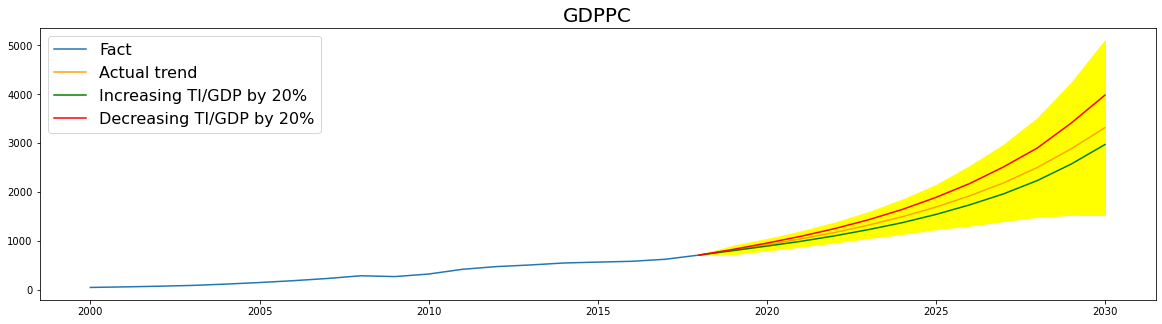

In [37]:
plt.figure(figsize=(20,5))
plt.title ('GDPPC',fontsize=20)
plt.plot(df1['GDP_P'])
l1=pd.DataFrame(mTI_med)['GDP_P']
l2=pd.DataFrame(sTI_med)['GDP_P']
plt.plot(range(2018,2031),l1,color='orange')
l1=pd.DataFrame(mTI_big)['GDP_P']
l2=pd.DataFrame(sTI_big)['GDP_P']
plt.plot(range(2018,2031),l1,color='green')
#plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
l1=pd.DataFrame(mTI_small)['GDP_P']
l2=pd.DataFrame(sTI_small)['GDP_P']
plt.plot(range(2018,2031),l1,color='red')
#plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
l1=pd.DataFrame(mTI_med)['GDP_P']
l2=pd.DataFrame(sTI_med)['GDP_P']
plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
plt.legend(['Fact','Actual trend','Increasing TI/GDP by 20%','Decreasing TI/GDP by 20%'],fontsize=16)
plt.show()


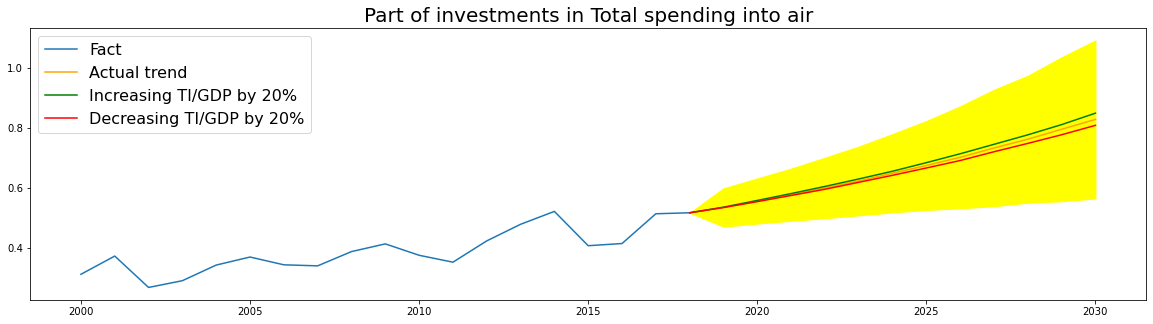

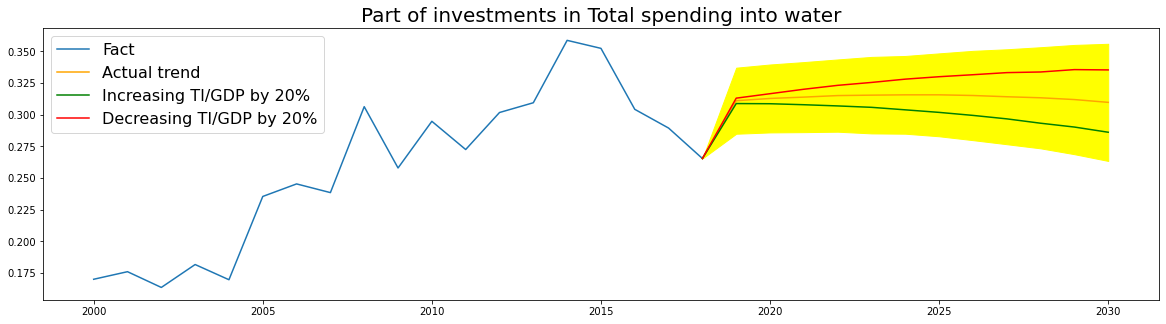

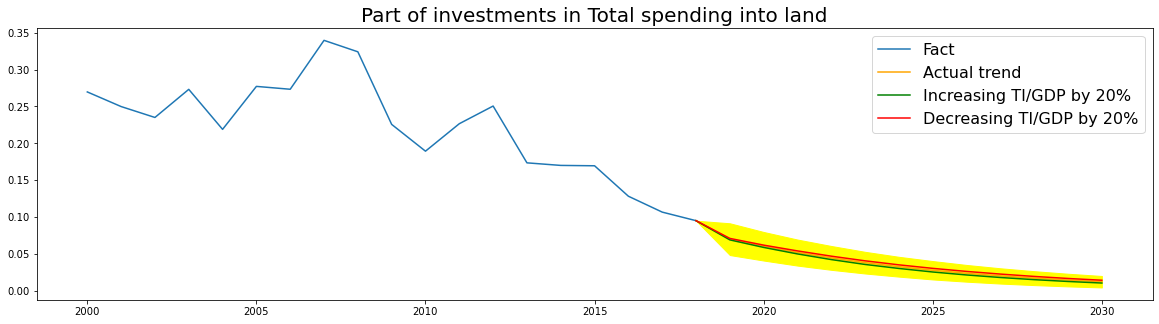

In [40]:
mm1=['air', 'water','land']
mm2=['IV_TIV','IW_TIW','IZ_TIZ']
for num in range(3):
    plt.figure(figsize=(20,5))
    plt.title ('Part of investments in Total spending into '+mm1[num],fontsize=20)
    plt.plot(df1[mm2[num]])
    l1=pd.DataFrame(mTI_med)[mm2[num]]
    l2=pd.DataFrame(sTI_med)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='orange')
    l1=pd.DataFrame(mTI_big)[mm2[num]]
    l2=pd.DataFrame(sTI_big)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mTI_small)[mm2[num]]
    l2=pd.DataFrame(sTI_small)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mTI_med)[mm2[num]]
    l2=pd.DataFrame(sTI_med)[mm2[num]]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing TI/GDP by 20%','Decreasing TI/GDP by 20%'],fontsize=16)
    plt.show()


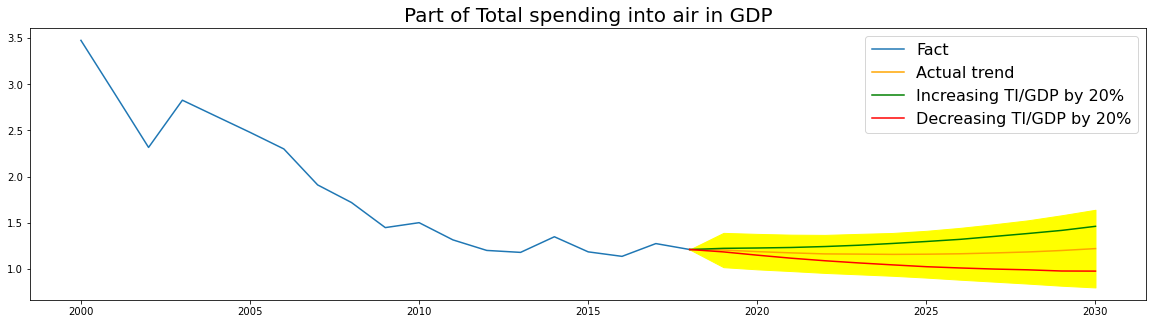

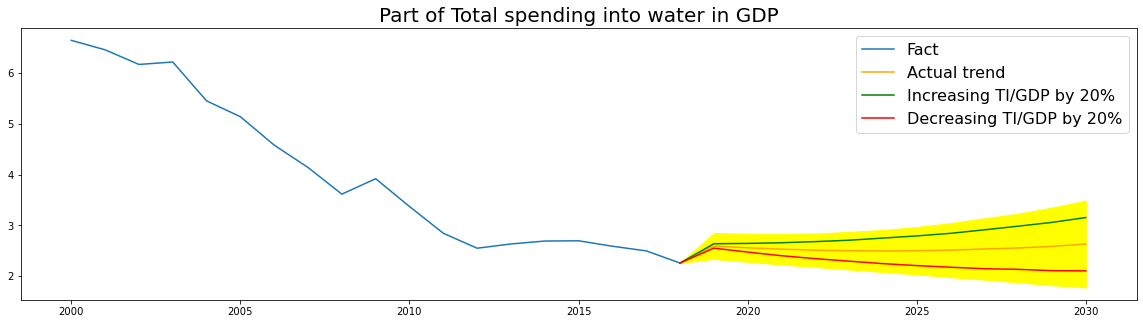

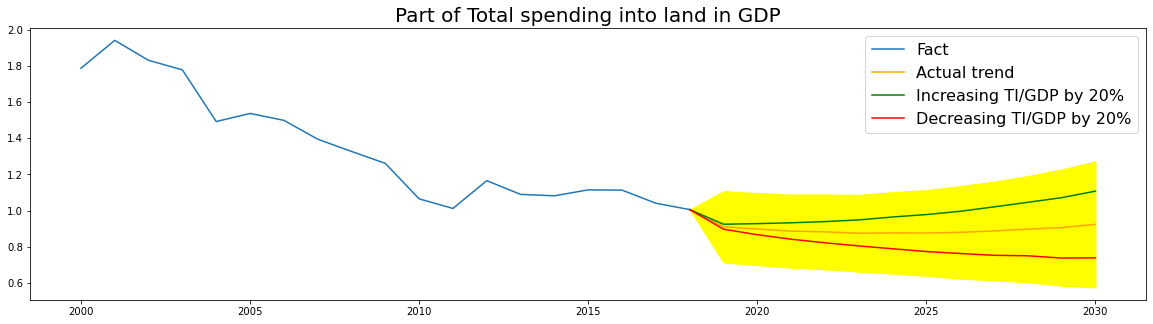

In [41]:
mm1=['air', 'water','land']
mm2=['TIV_GDP','TIW_GDP','TIZ_GDP']
for num in range(3):
    plt.figure(figsize=(20,5))
    plt.title ('Part of Total spending into '+mm1[num]+' in GDP',fontsize=20)
    plt.plot(df1[mm2[num]])
    l1=pd.DataFrame(mTI_med)[mm2[num]]
    l2=pd.DataFrame(sTI_med)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='orange')
    l1=pd.DataFrame(mTI_big)[mm2[num]]
    l2=pd.DataFrame(sTI_big)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mTI_small)[mm2[num]]
    l2=pd.DataFrame(sTI_small)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mTI_med)[mm2[num]]
    l2=pd.DataFrame(sTI_med)[mm2[num]]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing TI/GDP by 20%','Decreasing TI/GDP by 20%'],fontsize=16)
    plt.show()


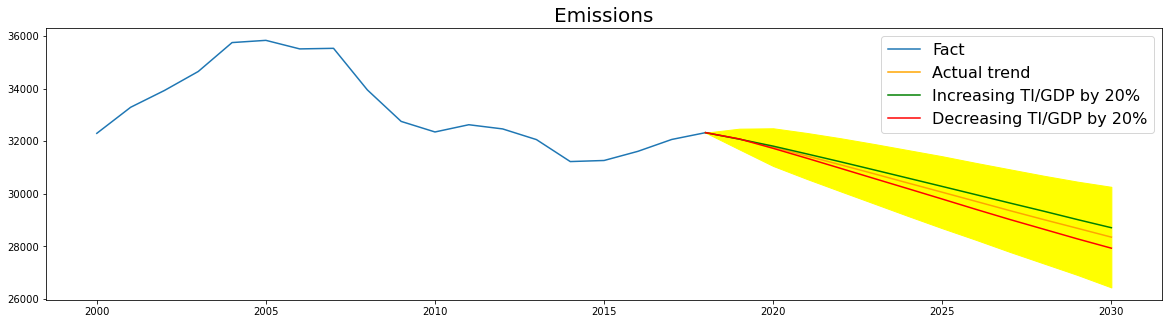

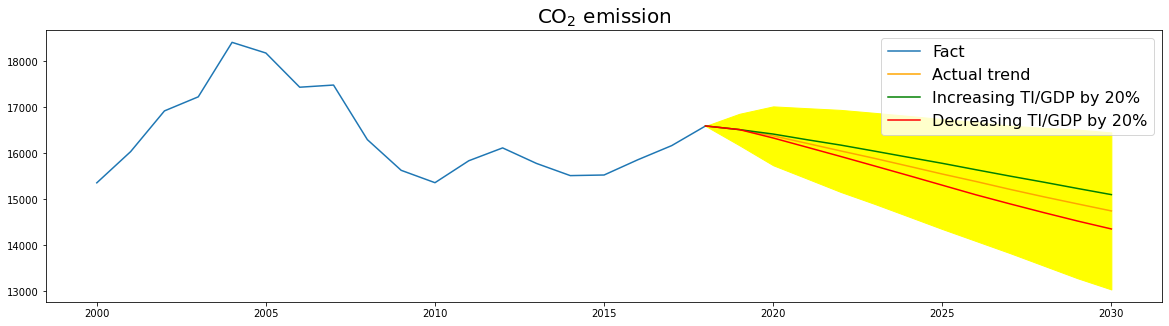

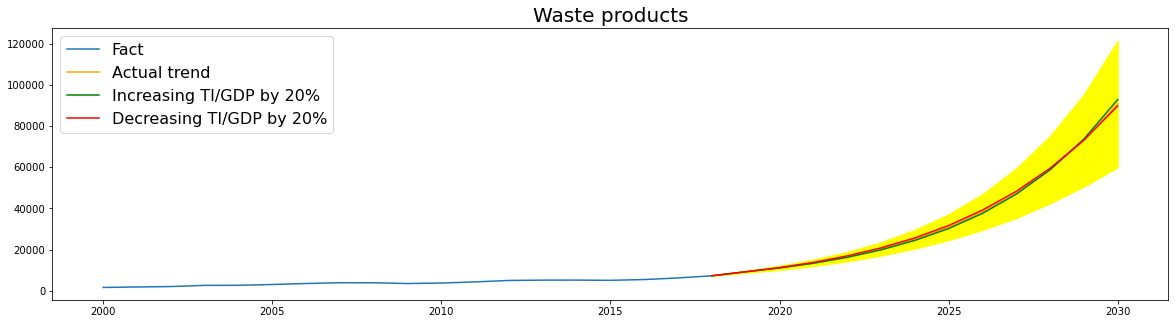

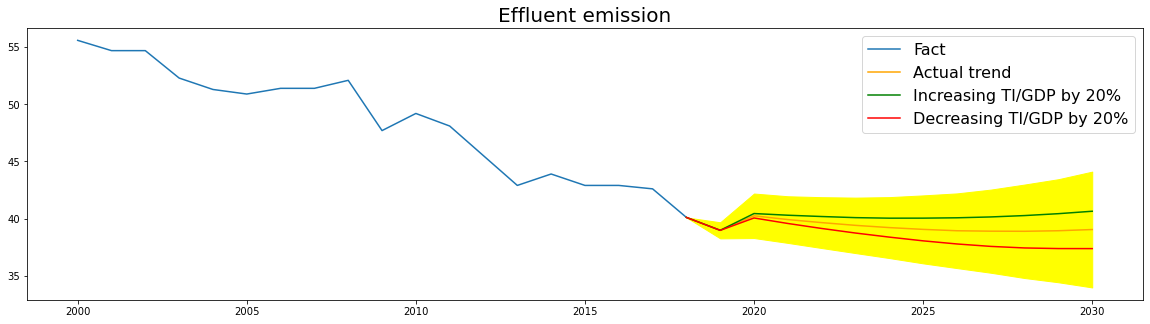

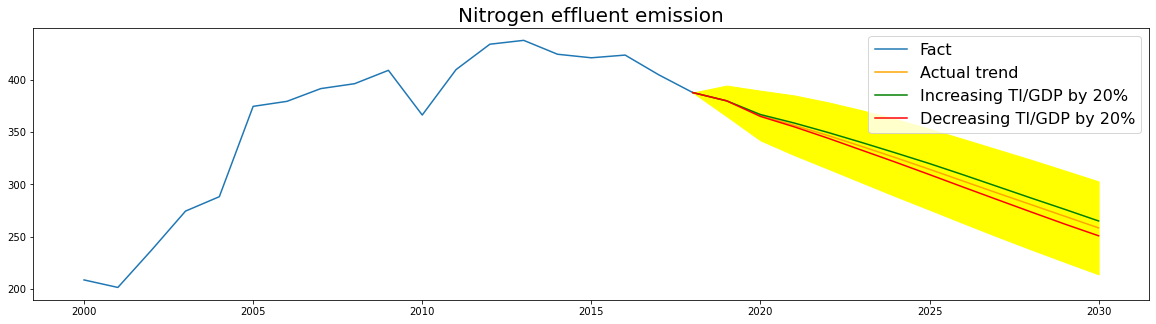

In [38]:
for el in range(5):
    yn=ynames[el]
    par=Y[el]
    plt.figure(figsize=(20,5))
    plt.title (yn,fontsize=20)
    plt.plot(df1[par])
    l1=pd.DataFrame(mTI_med)[par]
    l2=pd.DataFrame(sTI_med)[par]
    plt.plot(range(2018,2031),l1,color='orange')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    l1=pd.DataFrame(mTI_big)[par]
    l2=pd.DataFrame(sTI_big)[par]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mTI_small)[par]
    l2=pd.DataFrame(sTI_small)[par]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mTI_med)[par]
    l2=pd.DataFrame(sTI_med)[par]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing TI/GDP by 20%','Decreasing TI/GDP by 20%'],fontsize=16)
    plt.show()


# Сценарий 2. Регулируем I/GDP

                            OLS Regression Results                            
Dep. Variable:                 lnIGDP   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     63.15
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.56e-08
Time:                        08:32:23   Log-Likelihood:                 18.734
No. Observations:                  19   AIC:                            -31.47
Df Residuals:                      16   BIC:                            -28.63
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.3398    160.781     -0.270      0.7

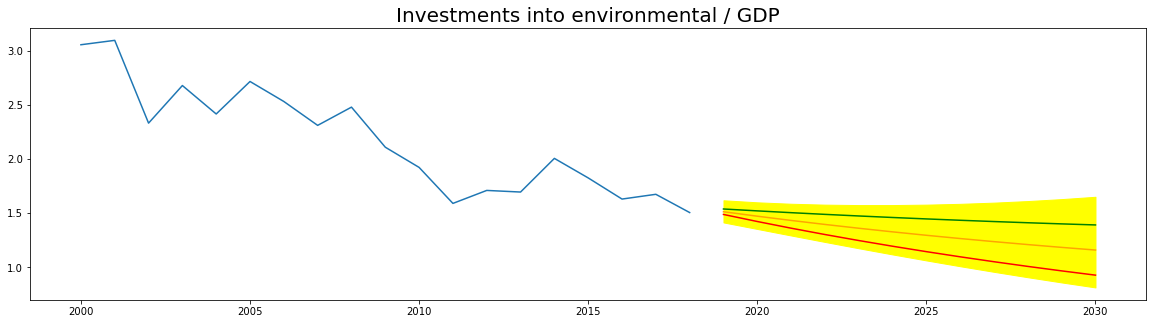

In [42]:
df_it1=pd.DataFrame(range(2019,2031),columns=['Year'])
df_it1['lnY']=np.log(df_it1.Year-1940)
df_it1.index=df_it1.Year
df_it1.head()
df1['IGDP']=df[X[0]]/df['GDP']
df1.index= df1.Year

ss1='lnIGDP'
ss2='IGDP'
df1[ss1]=np.log(df1[ss2])
df1['lnY']=np.log(df1.Year-1940)
best_model2 = smf.ols(ss1+' ~ Year +lnY ',data=df1).fit(cov_type='HC1')  
model_TI_GDP=best_model2
print(best_model2.summary()) 
res2=best_model2.get_prediction(exog=df_it1)
res_lo2= np.exp(res2.conf_int(alpha=0.1).T[0])
res_up2= np.exp(res2.conf_int(alpha=0.1).T[1])
res_upq=res_up2
res_mn2= np.exp(res2.predicted_mean)
res_mnq=res_mn2
plt.figure(figsize=(20,5))
plt.title ('Investments into environmental / GDP',fontsize=20)
plt.plot(df1[ss2])
ggg=list(df1[ss2])[-1]
ttt=np.arange(1,13)/12
plt.plot(df_it1.index,res_mn2,color='orange')
plt.fill_between(df_it1.index,res_lo2,res_up2,color='yellow')
plt.plot(df_it1.index,(1-ttt*0.2)*res_mn2,color='red')
#plt.fill_between(df_it1.index,np.array(res_lo2)*(1-ttt*0.2),(1-ttt*0.2)*np.array(res_up2),color='pink')
plt.plot(df_it1.index,(1+0.2*ttt)*res_mn2,color='green')
#plt.fill_between(df_it1.index,(1+0.2*ttt)*np.array(res_lo2),(1+0.2*ttt)*np.array(res_up2),color='lightgreen')

plt.show()


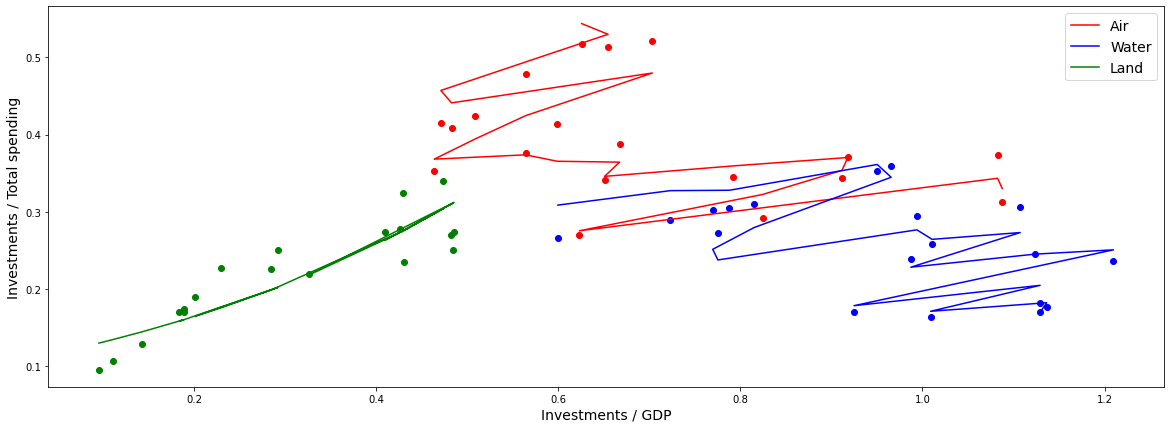

In [8]:
ddf3=df[['Year']]
uTIV=df[X1[0]]+df[X2[0]]
uTIW=df[X1[1]]+df[X2[1]]
uTIZ=df[X1[2]]+df[X2[2]]+df[X2[3]]
uIV=df[X1[0]]
uIW=df[X1[1]]
uIZ=df[X1[2]]
uGDP=df['GDP']
py1=uIV/uTIV
py2=uIW/uTIW
py3=uIZ/uTIZ
px1=uIV/uGDP
px2=uIW/uGDP
px3=uIZ/uGDP
ddf3['X1']=px1
ddf3['X2']=px2
ddf3['X3']=px3
ddf3['Y1']=py1
ddf3['Y2']=py2
ddf3['Y3']=py3
ddf3['lnY1']=np.log(py1)
ddf3['lnY2']=np.log(py2)
ddf3['lnY3']=np.log(py3)

plt.figure(figsize=(20,7))

plt.scatter(px1,py1,color='red')
plt.scatter(px2,py2,color='blue')
plt.scatter(px3,py3,color='green')
modelTI1 = smf.ols('lnY1 ~ Year+X1',data=ddf3).fit(cov_type='HC1')  
modelTI2 = smf.ols('lnY2 ~ Year+X2',data=ddf3).fit(cov_type='HC1')  
modelTI3 = smf.ols('lnY3 ~ X3',data=ddf3).fit(cov_type='HC1')  
plt.plot(px1,np.exp(modelTI1.predict(ddf3[['X1','X2','X3','Year']])),color='red')
plt.plot(px2,np.exp(modelTI2.predict(ddf3[['X1','X2','X3','Year']])),color='blue')
plt.plot(px3,np.exp(modelTI3.predict(ddf3[['X1','X2','X3','Year']])),color='green')
plt.xlabel ('Investments / GDP',fontsize=14)
plt.ylabel ('Investments / Total spending',fontsize=14)
plt.legend(['Air','Water','Land'],fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY1   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     73.37
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           8.73e-09
Time:                        11:04:58   Log-Likelihood:                 23.814
No. Observations:                  19   AIC:                            -41.63
Df Residuals:                      16   BIC:                            -38.79
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.7675      7.175    -12.094      0.0

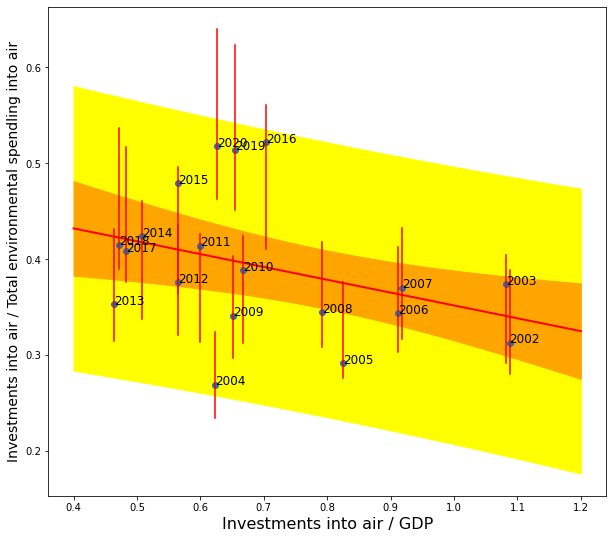

In [90]:
df3=pd.DataFrame(np.linspace(0.4,1.2,100),columns=['X1'])
print(modelTI1.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y1 ~ X1 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI1  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X1'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X1'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X1'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X1'],ddf3['Y1'])
    
    
for num,els in enumerate(np.array(ddf3[['X1','Y1']])):
    plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.xlabel ('Investments into air / GDP',fontsize=16)
plt.ylabel ('Investments into air / Total environmental spendling into air',fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY2   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.99e-10
Time:                        11:05:35   Log-Likelihood:                 18.942
No. Observations:                  19   AIC:                            -31.88
Df Residuals:                      16   BIC:                            -29.05
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.0493      9.498    -13.376      0.0

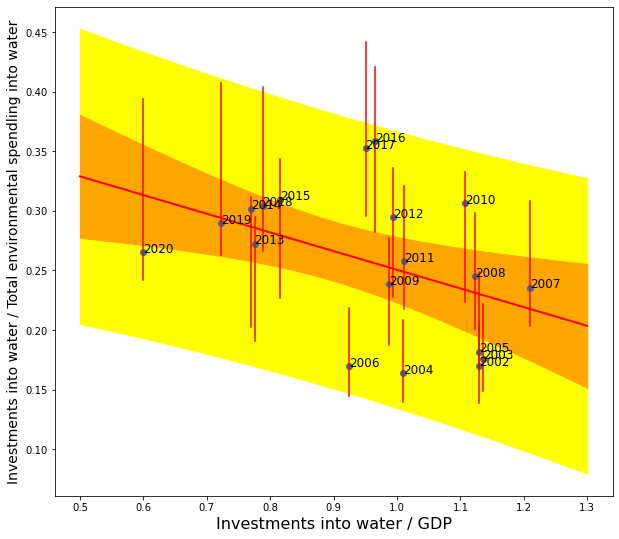

In [91]:
df3=pd.DataFrame(np.linspace(0.5,1.3,100),columns=['X2'])
print(modelTI2.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y2 ~ X2 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI2  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X2'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X2'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X2'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X2'],ddf3['Y2'])
    
    
for num,els in enumerate(np.array(ddf3[['X2','Y2']])):
    plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.xlabel ('Investments into water / GDP',fontsize=16)
plt.ylabel ('Investments into water / Total environmental spendling into water',fontsize=14)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   lnY3   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     48.64
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.24e-06
Time:                        11:06:16   Log-Likelihood:                 8.0322
No. Observations:                  19   AIC:                            -12.06
Df Residuals:                      17   BIC:                            -10.18
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2606      0.116    -19.439      0.0

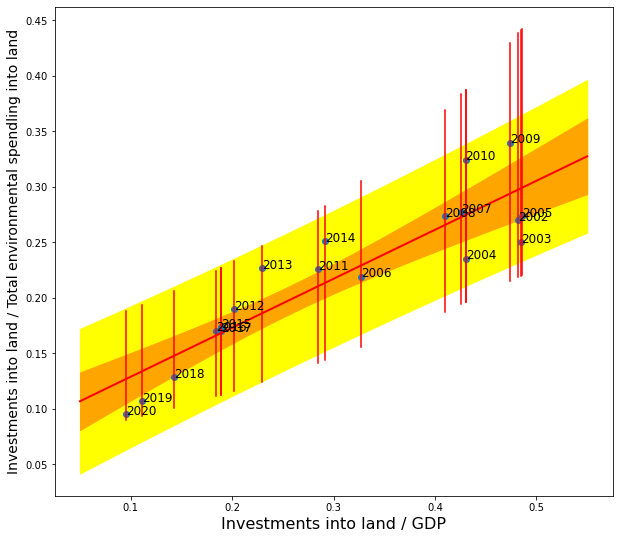

In [92]:
df3=pd.DataFrame(np.linspace(0.05,0.55,100),columns=['X3'])
print(modelTI3.summary())
plt.figure(figsize=(10,9))
model = smf.ols('Y3 ~ X3 ',data=ddf3).fit(cov_type='HC1')  
model2 = modelTI3  

res=model.get_prediction(exog=df3)
sf=res.summary_frame(alpha=0.05)
res_lo=sf['obs_ci_lower']
res_up=sf['obs_ci_upper']
res_lom=sf['mean_ci_lower']
res_upm=sf['mean_ci_upper']
res_mn= (res.predicted_mean)
    
res2=model2.get_prediction(exog=ddf3)
sf2=res2.summary_frame(alpha=0.05)
res_lo2=np.exp(sf2['obs_ci_lower'])
res_up2=np.exp(sf2['obs_ci_upper'])
res_lom2=np.exp(sf2['mean_ci_lower'])
res_upm2=np.exp(sf2['mean_ci_upper'])
res_mn2= (res2.predicted_mean)
    
plt.fill_between(df3['X3'],np.array(res_lo),np.array(res_up),color='yellow')
plt.fill_between(df3['X3'],np.array(res_lom),np.array(res_upm),color='orange')
plt.plot(df3['X3'],res_mn,color='red',linewidth=2)
plt.scatter(ddf3['X3'],ddf3['Y3'])
    
    
for num,els in enumerate(np.array(ddf3[['X3','Y3']])):
    plt.plot([els[0],els[0]],[res_lo2[num],res_up2[num]],color='red')
    plt.text(els[0],els[1],2002+num, fontsize=12)

plt.xlabel ('Investments into land / GDP',fontsize=16)
plt.ylabel ('Investments into land / Total environmental spendling into land',fontsize=14)
plt.show()


In [47]:
sdf=['IV_GDP','IW_GDP','IZ_GDP']
mTI=[]
sTI=[]
r1=(df[X1[0]])/df['GDP']
r2=(df[X1[1]])/df['GDP']
r3=(df[X1[2]])/df['GDP']
mTI.append((r1/(r1+r2+r3)).mean())
mTI.append((r2/(r1+r2+r3)).mean())
mTI.append((r3/(r1+r2+r3)).mean())
sTI.append((r1/(r1+r2+r3)).std())
sTI.append((r2/(r1+r2+r3)).std())
sTI.append((r3/(r1+r2+r3)).std())
mTI,sTI

([0.3546746768868509, 0.49420644334928193, 0.15111887976386718],
 [0.05148884973162154, 0.0481449667120692, 0.045451176513532685])

In [48]:
models['IV_TIV']=modelTI1
models['IW_TIW']=modelTI2
models['IZ_TIZ']=modelTI3

In [75]:
def I_modeling (k=0):
    sr_m=[]
    sr_std=[]
    nn=10000
    df_mod=pd.DataFrame([2018]*nn,columns=['Year'])
    df_mod['Year1']=df_mod['Year']-2001
    df_mod['lnYear']=np.log(df_mod['Year1'])
    xxx=['InvVozd','InvVozd','InvVoda','InvZeml','InvZeml']
    xxx1=['IV','IV','IW','IZ','IZ']

    dft=df.loc[2018]
    dfpr=df.loc[2017]
    Yr=2018

    df_mod['People']=dft.People
    df_mod['People_p']=dft.People/dfpr.People
    df_mod['GDP']=dft.GDP
    df_mod['GDP_P_p']=(dft.GDP/dft.People)/(dfpr.GDP/dfpr.People)
    df_mod['GDP_P']=dft.GDP/dft.People
    for el in range(5):
        df_mod[Y[el]]=dft[Y[el]]
        df_mod[Y[el]+'_p']=dft[Y[el]]/dfpr[Y[el]]

    df_mod['TI_GDP_p']=(dft['VsegoVost']/dft['GDP'])/(dfpr['VsegoVost']/dfpr['GDP'])
    df_mod['TI_GDP']=(dft['VsegoVost']/dft['GDP'])
    df_mod['I_GDP_p']=(dft['InvOkr']/dft['GDP'])/(dfpr['InvOkr']/dfpr['GDP'])
    df_mod['I_GDP']=(dft['InvOkr']/dft['GDP'])

    df_mod['TIV_GDP']=((dft[X2[0]]+dft[X1[0]])/dft['GDP'])
    df_mod['TIW_GDP']=((dft[X2[1]]+dft[X1[1]])/dft['GDP'])
    df_mod['TIZ_GDP']=((dft[X2[2]]+dft[X2[3]]+dft[X1[2]])/dft['GDP'])
    df_mod['TIV_GDP_p']=((dft[X1[0]]/(dft[X1[0]]+dft[X2[0]])))/((dfpr[X1[0]]/(dfpr[X1[0]]+dfpr[X2[0]])))
    df_mod['TIW_GDP_p']=(((dft[X2[1]]+dft[X1[1]])/dft['GDP']))/(((dfpr[X2[1]]+dfpr[X1[1]])/dfpr['GDP']))
    df_mod['TIZ_GDP_p']=(((dft[X2[2]]+dft[X2[3]]+dft[X1[2]])/dft['GDP']))/(((dfpr[X2[2]]+dfpr[X2[3]]+dfpr[X1[2]])/dfpr['GDP']))
    df_mod['TIV_TI']=df_mod['TIV_GDP']/df_mod['TI_GDP']
    df_mod['TIW_TI']=df_mod['TIW_GDP']/df_mod['TI_GDP']
    df_mod['TIZ_TI']=df_mod['TIZ_GDP']/df_mod['TI_GDP']
    df_mod['TIV_TI_p']=df_mod['TIV_GDP_p']/df_mod['TI_GDP_p']
    df_mod['TIW_TI_p']=df_mod['TIW_GDP_p']/df_mod['TI_GDP_p']
    df_mod['TIZ_TI_p']=df_mod['TIZ_GDP_p']/df_mod['TI_GDP_p']

    df_mod['IV_TIV']=(dft[X1[0]]/(dft[X1[0]]+dft[X2[0]]))
    df_mod['IW_TIW']=(dft[X1[1]]/(dft[X1[1]]+dft[X2[1]]))
    df_mod['IZ_TIZ']=(dft[X1[2]]/(dft[X1[2]]+dft[X2[3]]+dft[X2[2]]))
    df_mod['IV_TIV_p']=((dft[X1[0]]/(dft[X1[0]]+dft[X2[0]])))/((dfpr[X1[0]]/(dfpr[X1[0]]+dfpr[X2[0]])))
    df_mod['IW_TIW_p']=((dft[X1[1]]/(dft[X1[1]]+dft[X2[1]])))/((dfpr[X1[1]]/(dfpr[X1[1]]+dfpr[X2[1]])))
    df_mod['IZ_TIZ_p']=((dft[X1[2]]/(dft[X1[2]]+dft[X2[3]]+dft[X2[2]])))/((dfpr[X1[2]]/(dfpr[X1[2]]+dfpr[X2[3]]+dfpr[X2[2]])))

    df_mod['IV_GDP']=df_mod['IV_TIV']*df_mod['TIV_GDP']
    df_mod['IW_GDP']=df_mod['IW_TIW']*df_mod['TIW_GDP']
    df_mod['IZ_GDP']=df_mod['IZ_TIZ']*df_mod['TIZ_GDP']
    df_mod['IV_GDP_p']=df_mod['IV_TIV_p']*df_mod['TIV_GDP_p']
    df_mod['IW_GDP_p']=df_mod['IW_TIW_p']*df_mod['TIW_GDP_p']
    df_mod['IZ_GDP_p']=df_mod['IZ_TIZ_p']*df_mod['TIZ_GDP_p']

    for el in range(5):
        df_mod[Y[el]+'_I']=dft[Y[el]]/dft[xxx[el]]
        df_mod[Y[el]+'_I_p']=(dft[Y[el]]/dft[xxx[el]])/(dfpr[Y[el]]/dfpr[xxx[el]])
    sr_m.append(df_mod.mean())
    sr_std.append(df_mod.std())


    for Yr in range(2019,2031):
        for el in range (5):
            model2 = models[Y[el]+'_p']  
            res2=model2.get_prediction(exog=df_mod)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            df_mod[Y[el]+'_p']=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod[Y[el]]=df_mod[Y[el]]*df_mod[Y[el]+'_p']

        df_mod['Year']=Yr
        df_mod['Year1']=df_mod['Year']-2000
        df_mod['lnYear']=np.log(df_mod['Year1'])

        df_mod['People_p']=np.random.normal(loc=mP[Yr-2018]/mP[Yr-2019],scale=sP[Yr-2018]/mP[Yr-2019],size=(nn))
        df_mod['People']=df_mod['People']*df_mod['People_p']

        igdp=np.random.normal(loc=(1+k*(Yr-2018)/12)*res_mnq[Yr-2019],scale=(res_upq[Yr-2019]-res_mnq[Yr-2019])/2,size=(nn))
        igdp1=igdp/df_mod['I_GDP']
        df_mod['I_GDP_p']=igdp1
        df_mod['I_GDP']=igdp

        tivr=igdp*np.random.normal(loc=mTI[0],scale=sTI[0],size=(nn))
        tivw=igdp*np.random.normal(loc=mTI[1],scale=sTI[1],size=(nn))
        tivz=igdp*np.random.normal(loc=mTI[2],scale=sTI[2]/2,size=(nn))    


    
        tivr1=tivr/(tivr+tivw+tivz)*df_mod['I_GDP']
        tivw1=tivw/(tivr+tivw+tivz)*df_mod['I_GDP']
        tivz1=tivz/(tivr+tivw+tivz)*df_mod['I_GDP']
    
        df_mod['IV_GDP_p']=tivr1/df_mod['IV_GDP']
        df_mod['IW_GDP_p']=tivw1/df_mod['IW_GDP']
        df_mod['IZ_GDP_p']=tivz1/df_mod['IZ_GDP']

        df_mod['IV_GDP']=tivr1
        df_mod['IW_GDP']=tivw1
        df_mod['IZ_GDP']=tivz1

        df_xxx=df_mod[['Year','IV_GDP','IW_GDP','IZ_GDP']]
        df_xxx.columns=['Year','X1','X2','X3']
        for el in ['V','W','Z']:
            model2=models['I'+el+'_TI'+el]
            res2=model2.get_prediction(exog=df_xxx)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            qqq=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod['I'+el+'_TI'+el+'_p']=qqq/df_mod['I'+el+'_TI'+el]
            df_mod['I'+el+'_TI'+el]=qqq
            
            qqq=df_mod['I'+el+'_GDP']/df_mod['I'+el+'_TI'+el]
            df_mod['TI'+el+'_GDP'+'_p']=qqq/df_mod['TI'+el+'_GDP']
            df_mod['TI'+el+'_GDP']=qqq
        
        qqq=df_mod['TIV_GDP']+df_mod['TIW_GDP']+df_mod['TIZ_GDP']
        df_mod['TI_GDP_p']=qqq/df_mod['TI_GDP']
        df_mod['TI_GDP']=qqq
        
        for el in ['V','W','Z']:
            qqq=df_mod['TI'+el+'_GDP']/df_mod['TI_GDP']
            df_mod['TI'+el+'_TI'+'_p']=qqq/df_mod['TI'+el+'_TI']
            df_mod['TI'+el+'_TI']=qqq
        
        for el in range (5):
            model2 = models[Y[el]+'_I_p']  
            res2=model2.get_prediction(exog=df_mod)
            sf2=res2.summary_frame(alpha=0.05)
            res_upm2=sf2['mean_ci_upper']
            res_mn2= (res2.predicted_mean)
            res_sigm=(res_upm2-res_mn2)/2
            df_mod[Y[el]+'_I_p']=np.exp(np.random.normal(loc=res_mn2,scale=res_sigm))
            df_mod[Y[el]+'_I']=qqq*df_mod[Y[el]+'_I']

        gdp=np.array([1]*nn)
        for el in range(5):
            gdp=gdp*(df_mod[Y[el]+'_p']/df_mod[Y[el]+'_I_p']/df_mod[xxx1[el]+'_T'+xxx1[el]+'_p']/df_mod['T'+xxx1[el]+'_GDP_p']/df_mod['People_p'])
        gdp=gdp**0.2
        df_mod['GDP_P']=gdp*df_mod['GDP_P']
        df_mod['GDP_P_p']=gdp
        df_mod['GDP']=df_mod['GDP_P']*df_mod['People']

        sr_m.append(df_mod.mean())
        sr_std.append(df_mod.std())
    return (sr_m,sr_std)

In [81]:
mI_med, sI_med =I_modeling (k=0)
pd.DataFrame(mI_med)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,0.493730,0.926845,0.253471,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,137372.558658,1.314732,936.418259,32082.098821,0.992424,...,0.150786,0.977835,0.077410,0.984141,3.536370e-02,0.339880,1.223311e-03,0.589383,1.183348e-02,0.342904
2,2020.0,20.0,2.995732,146.800002,1.000682,155240.764686,1.132018,1057.498381,31332.143955,0.976624,...,0.047776,0.908587,0.024527,0.912829,1.120479e-02,0.999907,3.875994e-04,0.869631,3.749372e-03,0.948495
3,2021.0,21.0,3.044522,146.999980,1.001362,173047.075765,1.116111,1177.191144,30887.189562,0.985836,...,0.015685,0.913001,0.008052,0.917357,3.678547e-03,0.996497,1.272494e-04,0.869270,1.230923e-03,0.947560
4,2022.0,22.0,3.091042,146.900022,0.999320,192670.206896,1.117609,1311.573617,30429.185267,0.985224,...,0.005331,0.906938,0.002737,0.910957,1.250361e-03,1.000348,4.325283e-05,0.867831,4.183984e-04,0.948776
5,2023.0,23.0,3.135494,146.700378,0.998641,212976.025054,1.111063,1451.775632,29972.461868,0.985048,...,0.001880,0.915497,0.000965,0.920254,4.408032e-04,0.995421,1.524839e-05,0.867708,1.475025e-04,0.946025
6,2024.0,24.0,3.178054,146.399981,0.997952,235776.711574,1.113680,1610.497915,29507.193633,0.984540,...,0.000685,0.905348,0.000352,0.909907,1.607198e-04,0.996647,5.559667e-06,0.866570,5.378042e-05,0.945063
7,2025.0,25.0,3.218876,146.001286,0.997277,260119.415037,1.111728,1781.631611,29041.191385,0.984284,...,0.000258,0.911396,0.000133,0.915745,6.058870e-05,0.996559,2.095902e-06,0.865865,2.027432e-05,0.945980
8,2026.0,26.0,3.258097,145.594782,0.997216,285574.687538,1.107328,1961.458357,28563.177686,0.983620,...,0.000101,0.911581,0.000052,0.915628,2.361657e-05,0.997297,8.169511e-07,0.866091,7.902627e-06,0.945899
9,2027.0,27.0,3.295837,145.085110,0.996499,313393.028347,1.109444,2160.137144,28097.768134,0.983803,...,0.000041,0.909385,0.000021,0.913798,9.508296e-06,0.992971,3.289137e-07,0.864389,3.181686e-06,0.941999


In [82]:
mI_big, sI_big =I_modeling (k=0.2)
pd.DataFrame(mI_big)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,0.493730,0.926845,0.253471,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,137510.228791,1.316049,937.356706,32086.622243,0.992564,...,0.150739,0.967094,0.077386,0.973600,3.535265e-02,0.335055,1.222929e-03,0.577502,1.182978e-02,0.336673
2,2020.0,20.0,2.995732,146.800001,1.000682,154080.341939,1.122263,1049.593605,31348.515188,0.976996,...,0.047780,0.898998,0.024529,0.903245,1.120592e-02,0.991589,3.876383e-04,0.860371,3.749748e-03,0.940386
3,2021.0,21.0,3.044522,147.000007,1.001362,170399.706450,1.107230,1159.181627,30936.461043,0.986898,...,0.015706,0.901044,0.008063,0.905322,3.683541e-03,0.987965,1.274221e-04,0.858771,1.232594e-03,0.936771
4,2022.0,22.0,3.091042,146.899932,0.999319,187154.842291,1.102227,1274.029447,30508.027060,0.986199,...,0.005366,0.903518,0.002755,0.907863,1.258419e-03,0.986834,4.353158e-05,0.859304,4.210948e-04,0.936499
5,2023.0,23.0,3.135494,146.700015,0.998639,204920.452657,1.099776,1396.867111,30071.415622,0.985743,...,0.001898,0.900694,0.000975,0.904581,4.452167e-04,0.993832,1.540106e-05,0.858650,1.489794e-04,0.943169
6,2024.0,24.0,3.178054,146.398036,0.997942,223596.850227,1.096967,1527.322090,29628.243999,0.985319,...,0.000694,0.900530,0.000356,0.904866,1.626969e-04,0.987275,5.628056e-06,0.858527,5.444197e-05,0.935859
7,2025.0,25.0,3.218876,146.001368,0.997290,242657.273396,1.092212,1662.031241,29185.788002,0.985131,...,0.000263,0.904233,0.000135,0.908341,6.159596e-05,0.990236,2.130745e-06,0.856538,2.061137e-05,0.938903
8,2026.0,26.0,3.258097,145.605632,0.997289,261649.812611,1.085773,1796.998288,28738.385797,0.984747,...,0.000103,0.901969,0.000053,0.906259,2.413547e-05,0.985689,8.349010e-07,0.857516,8.076261e-06,0.935616
9,2027.0,27.0,3.295837,145.098640,0.996518,281496.037663,1.084834,1940.080989,28286.568213,0.984353,...,0.000042,0.906205,0.000021,0.910386,9.761839e-06,0.990174,3.376843e-07,0.858702,3.266528e-06,0.940260


In [83]:
mI_small, sI_small =I_modeling (k=-0.2)
pd.DataFrame(mI_small)

,Year,Year1,lnYear,People,People_p,GDP,GDP_P_p,GDP_P,Vibrosi,Vibrosi_p,...,Vibrosi_I,Vibrosi_I_p,CO2_I,CO2_I_p,Othodi_I,Othodi_I_p,Stoki_I,Stoki_I_p,Nitrati_I,Nitrati_I_p
0,2018.0,17.0,2.833213,146.900000,1.000681,104629.600000,1.137206,712.250511,32327.000000,1.008077,...,0.493730,0.926845,0.253471,0.943700,1.157944e-01,1.237801,4.005594e-03,0.960590,3.874738e-02,0.977874
1,2019.0,19.0,2.944439,146.700000,0.998639,137808.993978,1.318909,939.393279,32087.617734,0.992595,...,0.150510,0.987376,0.077269,0.993110,3.529900e-02,0.346935,1.221073e-03,0.598004,1.181183e-02,0.350452
2,2020.0,20.0,2.995732,146.800004,1.000682,156881.487931,1.140493,1068.674958,31313.581535,0.975878,...,0.047541,0.920031,0.024406,0.925025,1.114970e-02,1.007019,3.856937e-04,0.882350,3.730937e-03,0.957199
3,2021.0,21.0,3.044522,147.000003,1.001362,176554.927114,1.127370,1201.053898,30847.859006,0.985166,...,0.015558,0.921161,0.007987,0.925623,3.648920e-03,1.005891,1.262245e-04,0.878877,1.221009e-03,0.956579
4,2022.0,22.0,3.091042,146.899926,0.999319,198735.048375,1.130417,1352.860028,30362.893546,0.984324,...,0.005277,0.917472,0.002709,0.921790,1.237685e-03,1.003329,4.281436e-05,0.875758,4.141568e-04,0.952738
5,2023.0,23.0,3.135494,146.700092,0.998640,223828.292730,1.132642,1525.754870,29879.494003,0.984141,...,0.001849,0.916446,0.000949,0.920838,4.336450e-04,1.004341,1.500077e-05,0.876586,1.451072e-04,0.954091
6,2024.0,24.0,3.178054,146.399644,0.997952,250906.774030,1.129523,1713.850377,29386.949418,0.983580,...,0.000672,0.919543,0.000345,0.924060,1.575967e-04,1.002907,5.451629e-06,0.875079,5.273533e-05,0.952835
7,2025.0,25.0,3.218876,145.998877,0.997263,282016.060280,1.134324,1931.637800,28893.794486,0.983293,...,0.000253,0.919506,0.000130,0.924051,5.926451e-05,1.003689,2.050095e-06,0.872914,1.983122e-05,0.953002
8,2026.0,26.0,3.258097,145.601307,0.997277,317697.266162,1.139333,2182.005044,28399.604268,0.982991,...,0.000098,0.916663,0.000050,0.920604,2.300041e-05,0.999249,7.956367e-07,0.875111,7.696445e-06,0.949100
9,2027.0,27.0,3.295837,145.103221,0.996579,357537.236636,1.141427,2464.113136,27904.570708,0.982682,...,0.000039,0.914864,0.000020,0.919676,9.209587e-06,1.000680,3.185807e-07,0.869336,3.081732e-06,0.949227


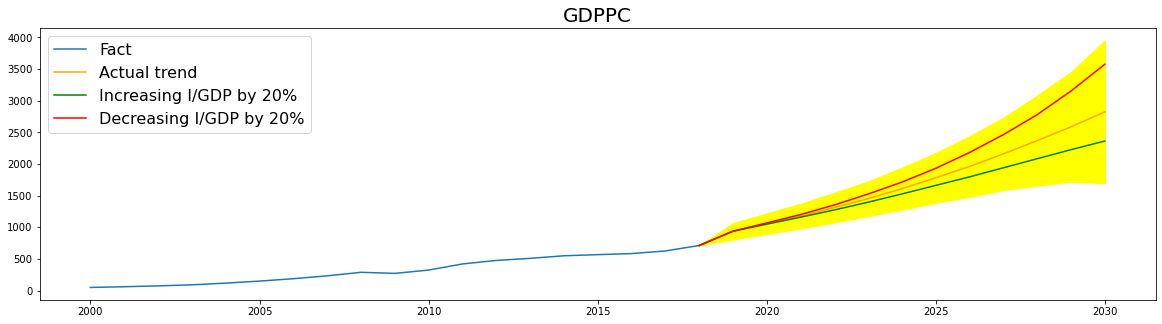

In [93]:
plt.figure(figsize=(20,5))
plt.title ('GDPPC',fontsize=20)
plt.plot(df1['GDP_P'])
l1=pd.DataFrame(mI_med)['GDP_P']
l2=pd.DataFrame(sI_med)['GDP_P']
plt.plot(range(2018,2031),l1,color='orange')
l1=pd.DataFrame(mI_big)['GDP_P']
l2=pd.DataFrame(sI_big)['GDP_P']
plt.plot(range(2018,2031),l1,color='green')
#plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
l1=pd.DataFrame(mI_small)['GDP_P']
l2=pd.DataFrame(sI_small)['GDP_P']
plt.plot(range(2018,2031),l1,color='red')
#plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
l1=pd.DataFrame(mI_med)['GDP_P']
l2=pd.DataFrame(sI_med)['GDP_P']
plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
plt.legend(['Fact','Actual trend','Increasing I/GDP by 20%','Decreasing I/GDP by 20%'],fontsize=16)
plt.show()


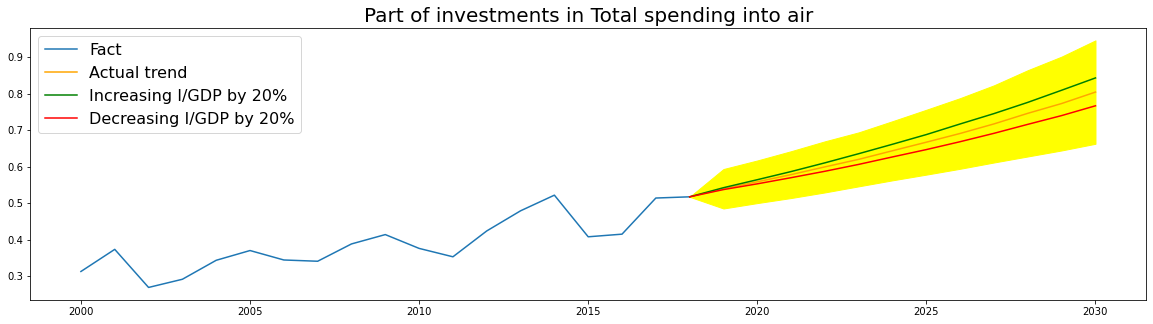

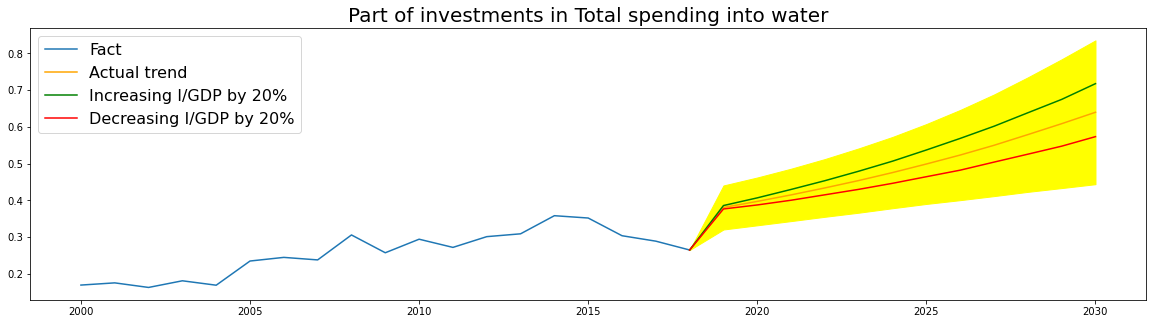

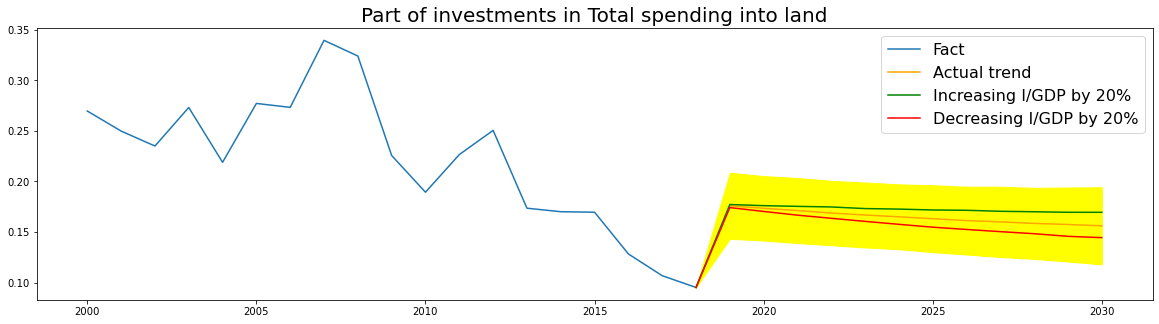

In [94]:
mm1=['air', 'water','land']
mm2=['IV_TIV','IW_TIW','IZ_TIZ']
for num in range(3):
    plt.figure(figsize=(20,5))
    plt.title ('Part of investments in Total spending into '+mm1[num],fontsize=20)
    plt.plot(df1[mm2[num]])
    l1=pd.DataFrame(mI_med)[mm2[num]]
    l2=pd.DataFrame(sI_med)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='orange')
    l1=pd.DataFrame(mI_big)[mm2[num]]
    l2=pd.DataFrame(sI_big)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mI_small)[mm2[num]]
    l2=pd.DataFrame(sI_small)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mI_med)[mm2[num]]
    l2=pd.DataFrame(sI_med)[mm2[num]]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing I/GDP by 20%','Decreasing I/GDP by 20%'],fontsize=16)
    plt.show()


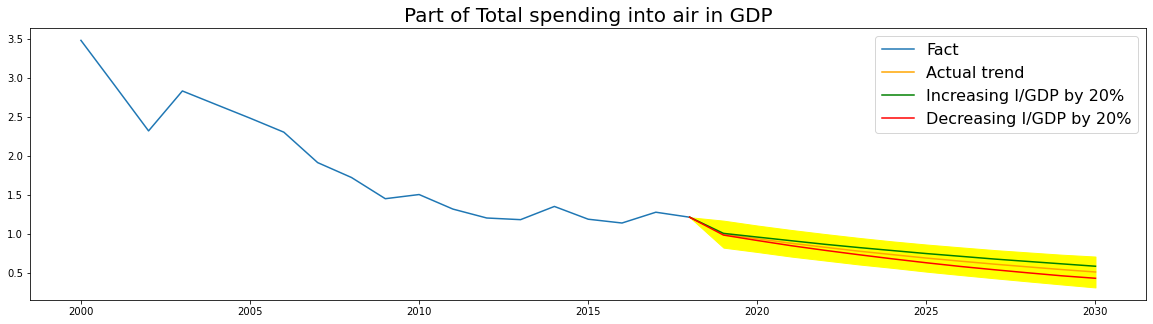

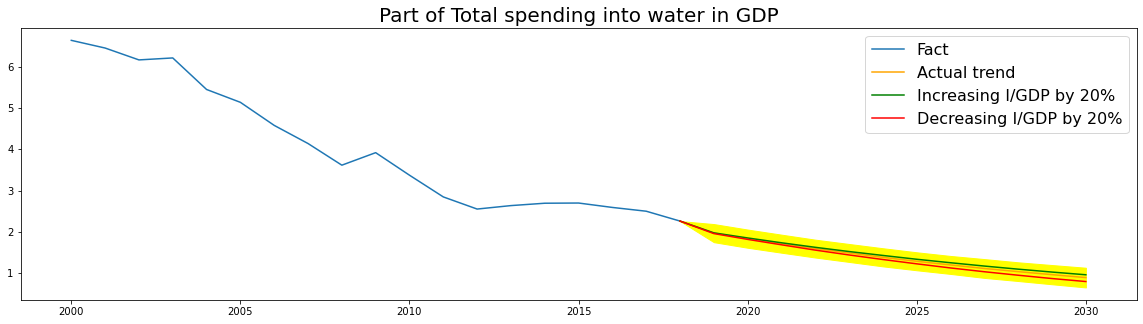

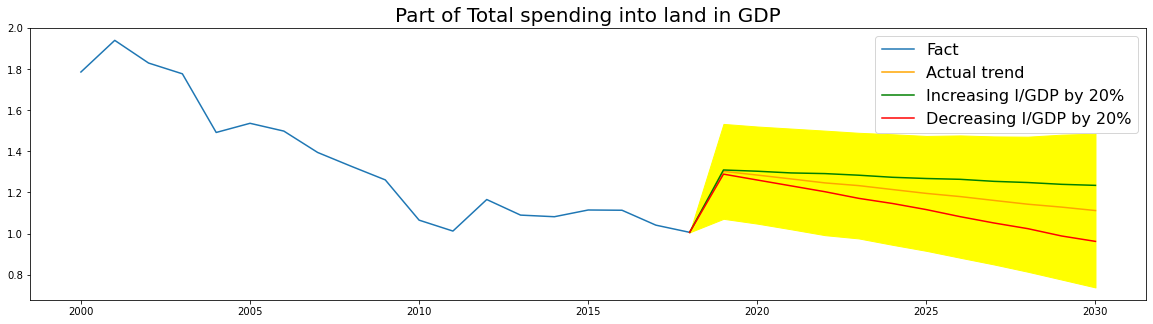

In [95]:
mm1=['air', 'water','land']
mm2=['TIV_GDP','TIW_GDP','TIZ_GDP']
for num in range(3):
    plt.figure(figsize=(20,5))
    plt.title ('Part of Total spending into '+mm1[num]+' in GDP',fontsize=20)
    plt.plot(df1[mm2[num]])
    l1=pd.DataFrame(mI_med)[mm2[num]]
    l2=pd.DataFrame(sI_med)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='orange')
    l1=pd.DataFrame(mI_big)[mm2[num]]
    l2=pd.DataFrame(sI_big)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mI_small)[mm2[num]]
    l2=pd.DataFrame(sI_small)[mm2[num]]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mI_med)[mm2[num]]
    l2=pd.DataFrame(sI_med)[mm2[num]]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing I/GDP by 20%','Decreasing I/GDP by 20%'],fontsize=16)
    plt.show()


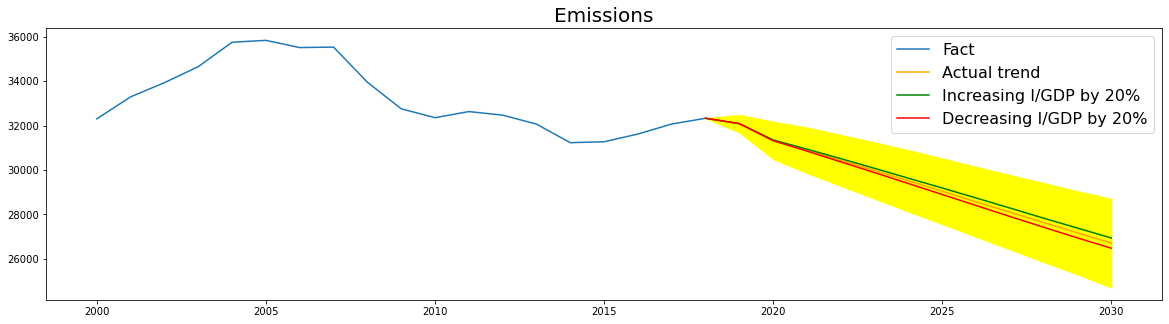

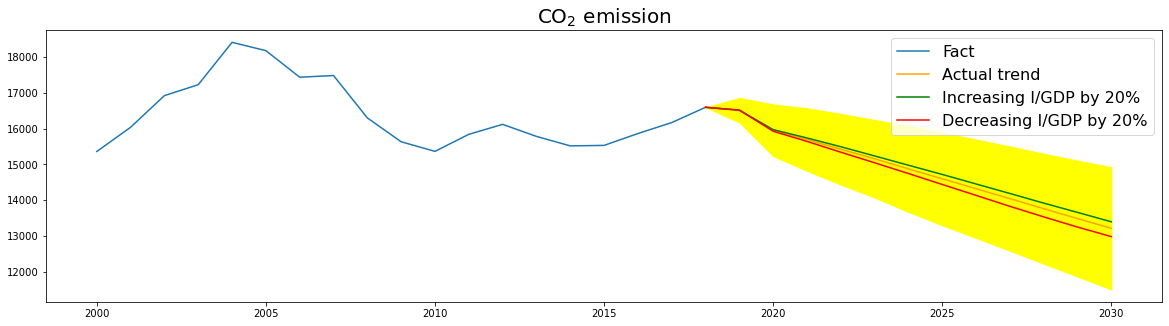

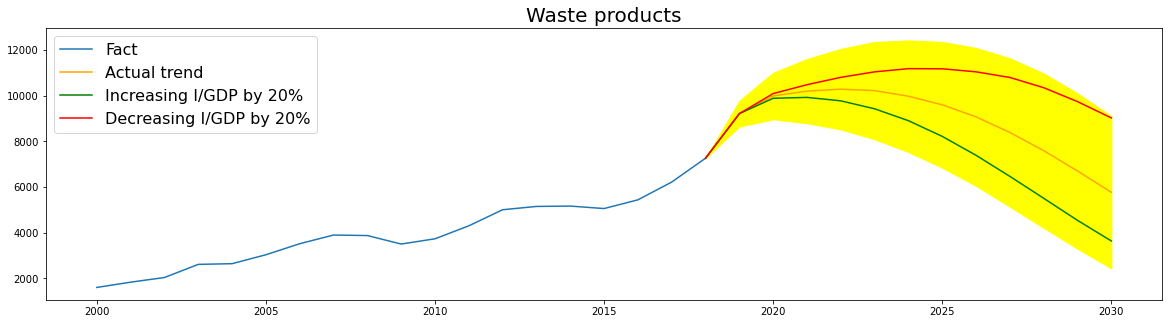

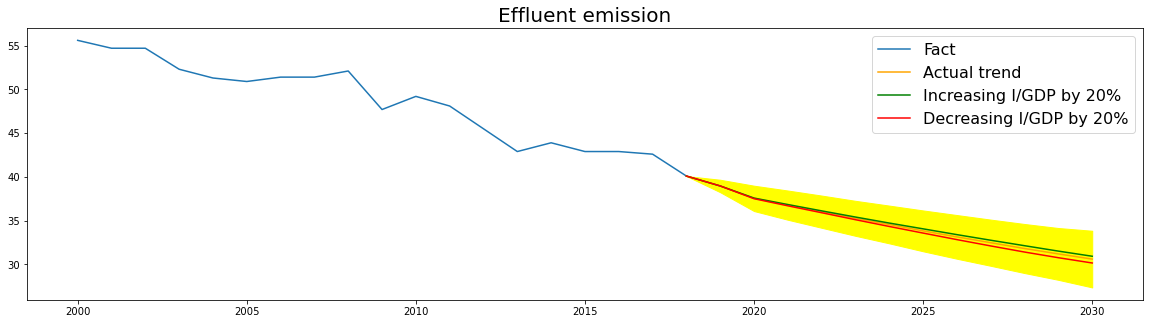

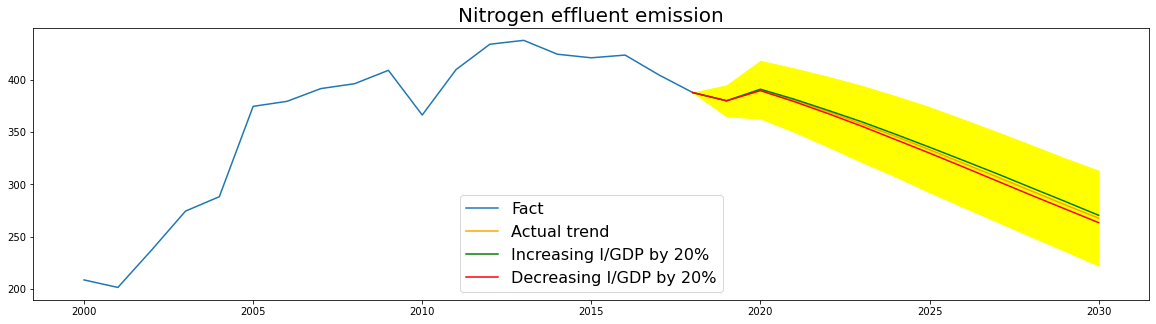

In [96]:
for el in range(5):
    yn=ynames[el]
    par=Y[el]
    plt.figure(figsize=(20,5))
    plt.title (yn,fontsize=20)
    plt.plot(df1[par])
    l1=pd.DataFrame(mI_med)[par]
    l2=pd.DataFrame(sI_med)[par]
    plt.plot(range(2018,2031),l1,color='orange')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    l1=pd.DataFrame(mI_big)[par]
    l2=pd.DataFrame(sI_big)[par]
    plt.plot(range(2018,2031),l1,color='green')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='lightgreen')
    l1=pd.DataFrame(mI_small)[par]
    l2=pd.DataFrame(sI_small)[par]
    plt.plot(range(2018,2031),l1,color='red')
    #plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='pink')
    l1=pd.DataFrame(mI_med)[par]
    l2=pd.DataFrame(sI_med)[par]
    plt.fill_between(range(2018,2031),l1-2*l2,l1+2*l2,color='yellow')
    plt.legend(['Fact','Actual trend','Increasing I/GDP by 20%','Decreasing I/GDP by 20%'],fontsize=16)
    plt.show()
